# Dataset

Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

We need to install kaggle library, doing pip install kaggle, already registered there you can download thousands of dataset to practice your skills.
After the Dataset downloaded, we can open it or copy to our Project folder to keep it there(i would like), but as to space memory on HDD and not to duplicate you can just keep in a variable the path where is the dataset so you can call it everytime you want to read it. Because the dataset is on cache i decided to keep it on the project folder

In [1]:
# import kagglehub
#
# # Download latest version
# path = kagglehub.dataset_download("blastchar/telco-customer-churn")
#
# print("Path to dataset files:", path)

# EDA Exploratory Dataset Analysis

Now we are going to read the dataset, and review for NaN's, Distribution's, Categorical Variables, Numeric Variables, target, we need to be sure the dataset to feed the ML models is highly Quality.

In [5]:
import pandas as pd


df = pd.read_csv(r'C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\Telco Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')
# I normally use the method print(), to validate <-- TIP
print(df.head())
#after some prints the output will be so large so once you validate the expected response you can just comment the print method or just deleted, i normally use for troubleshooting

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

### Lets Beguin with Exploratory analysis

In [6]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plotting library
import seaborn as sns # we will use it to see correlation it has good pantones

#settings for better visuals
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

#loading the dataset
df = pd.read_csv(r'C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\Telco Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')

#2 Lets Print the basics o the dataset
print(f'Shape of the dataset: {df.shape}')
print(f'Columns type: {df.dtypes}')
print(f'Missing values: {df.isnull().sum()}')
print(df.columns)

#todo code a script that detect trash into the rows for object dtypes as in "TotalCharges", exists values as string, and values as "", and so on so before proceeding we need to detect this as if missing values detection, here i learned different options, as it is a numeric value and it appears as object we can push the data to convert into numeric value after then, all the nan or null values means as a erros in the data so we can review the data and check if to keep or to fullfill using an statistical method


Shape of the dataset: (7043, 21)
Columns type: customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
Missing values: customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contr

### Target Variable: Churn (Distribution)

In this step, we analyze the distribution of the target variable **Churn**.
The purpose is to understand how many customers stayed (`No`) versus how many customers left (`Yes`).

- The printed counts show that:
  - **5174 customers** did not churn.
  - **1869 customers** churned.

- The bar plot provides a visual confirmation of the imbalance in the dataset,
  where the number of non-churned customers is significantly higher than the churned ones.

This imbalance is important to consider, since it may affect the performance of machine learning models if not handled properly.


Churn counts: Churn
No     5174
Yes    1869
Name: count, dtype: int64


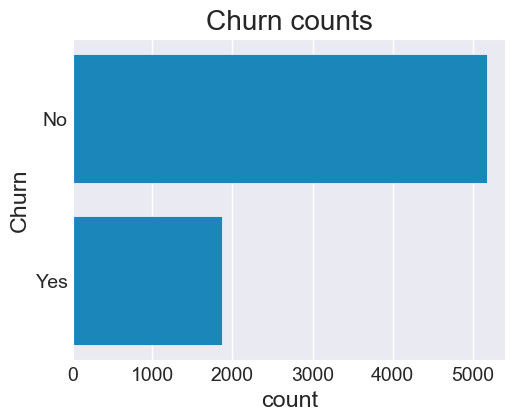

In [7]:
#Target Variable Churn (Distribution)

churn_counts = df['Churn'].value_counts()
print(f'Churn counts: {churn_counts}')

plt.figure(figsize=(5,4))
sns.countplot(df['Churn'])
plt.title('Churn counts')
plt.savefig(r'C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\Telco Customer Churn\Figures\Churn counts.png')
plt.show()

### 4. Numerical Features Analysis

In this step, we focus on the **numeric variables** in the dataset to better understand their distributions and relationships.

---

#### 4.1. Summary Statistics
Using `df[num_cols].describe()`, we obtain descriptive statistics (mean, median, standard deviation, min, max, quartiles).
This helps us quickly identify the range of values and potential outliers.

---

#### 4.2. Distribution of Numeric Features
We plot histograms for the numeric columns:

- **SeniorCitizen:**
  Binary variable (0 = not senior, 1 = senior).
  Most customers are **not senior citizens**.

- **tenure:**
  Represents the number of months the customer has stayed.
  The distribution shows peaks at the **beginning** (new customers) and at the **end** (long-term loyal customers).

- **MonthlyCharges:**
  Spans from around \$20 to over \$100.
  Many customers pay lower charges, but there’s a broad spread, showing different service/package levels.

![Distributions of Numeric Features](dfcbb6b1-aa6b-4ffc-8b42-30b3d8337c53.png)

---

#### 4.3. Correlation Heatmap
We then compute the correlation matrix for numeric features:

- **SeniorCitizen** shows very low correlation with other features.
- **tenure** and **MonthlyCharges** have a small positive correlation (~0.25).
- Overall, numeric features are only **weakly correlated**, meaning they capture different aspects of customer information.

![Correlation Heatmap](1a5455dd-0887-46e8-bac4-bb2a8780c492.png)

---

This analysis highlights that:
- The dataset is not heavily redundant among numeric features.
- `MonthlyCharges` and `tenure` may have a slight influence on churn patterns, while `SeniorCitizen` adds categorical separation.


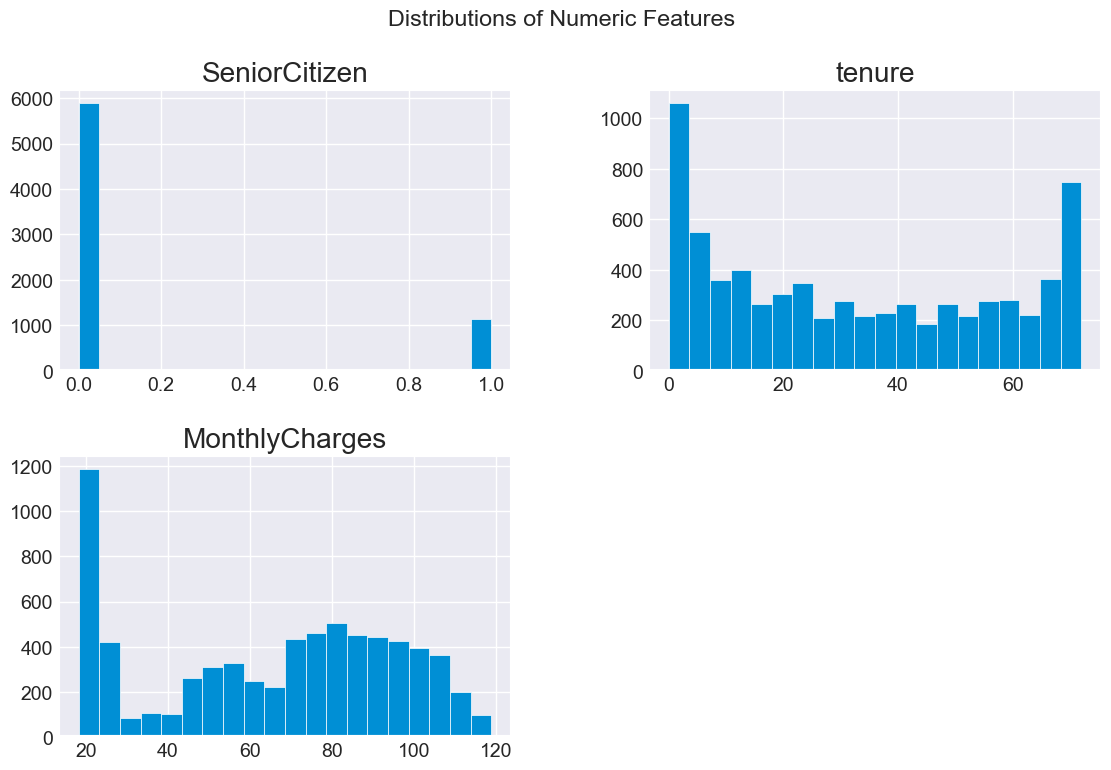

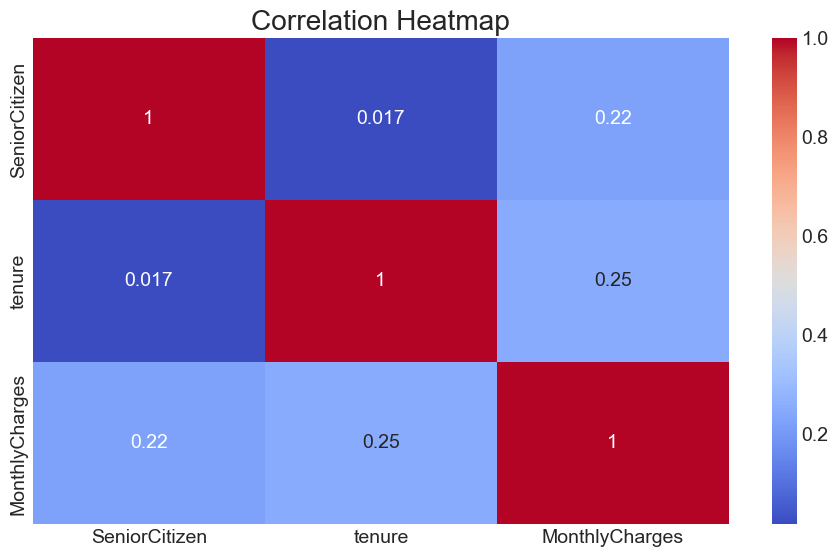

In [8]:
# ======================================
# Numerical Features Analysis
# ======================================
num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].describe()

# Histograms
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Distributions of Numeric Features")
plt.savefig(r'C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\Telco Customer Churn\Figures\Distribution of Numeric Features.png')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig(r'C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\Telco Customer Churn\Figures\Correlation Heatmap.png')
plt.show()


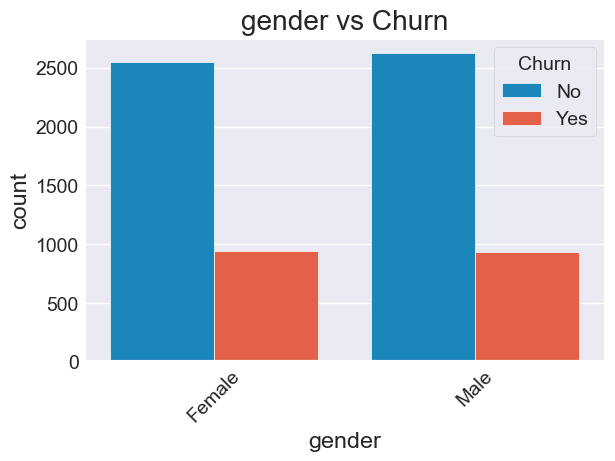

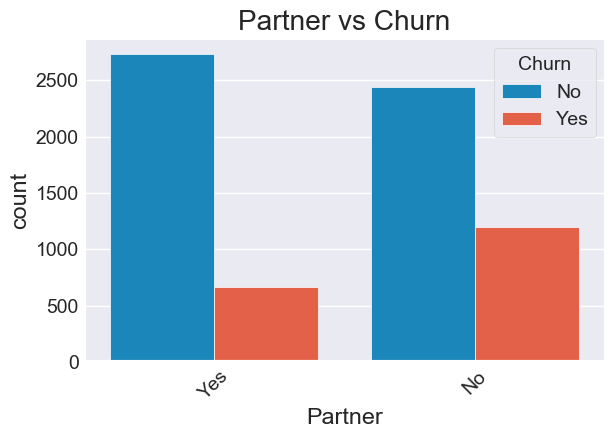

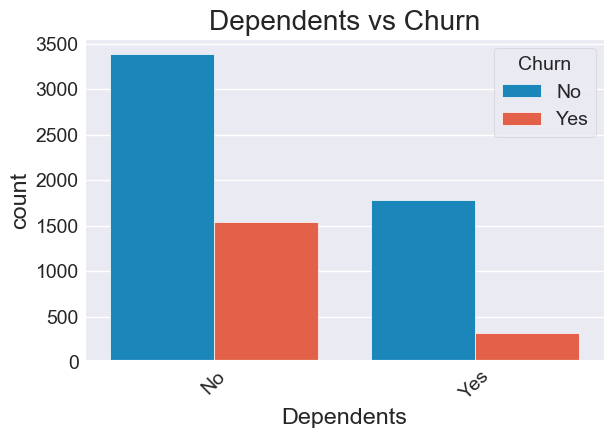

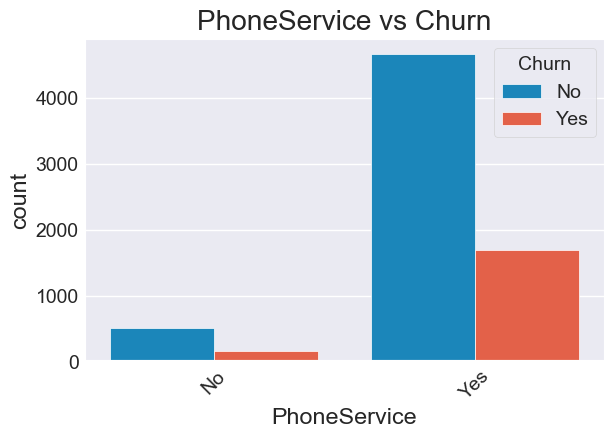

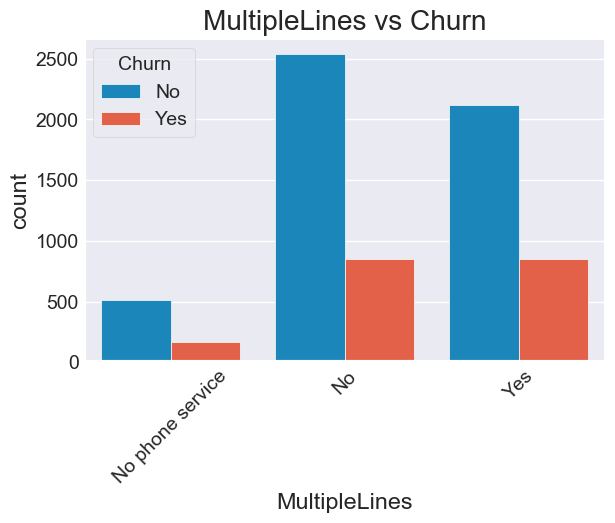

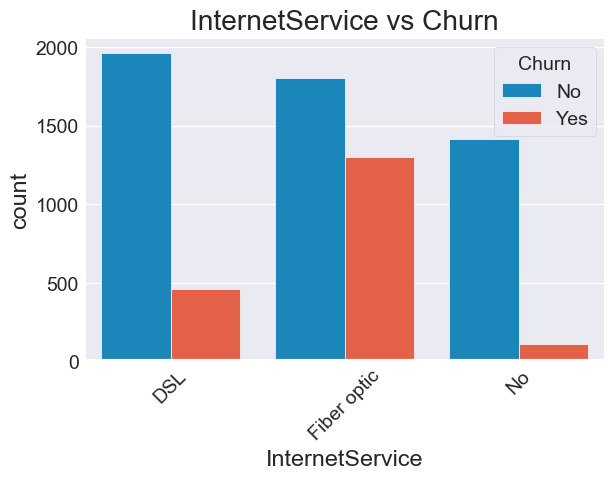

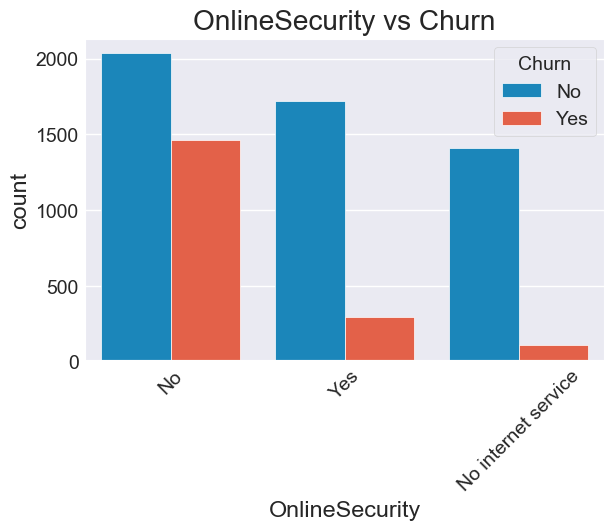

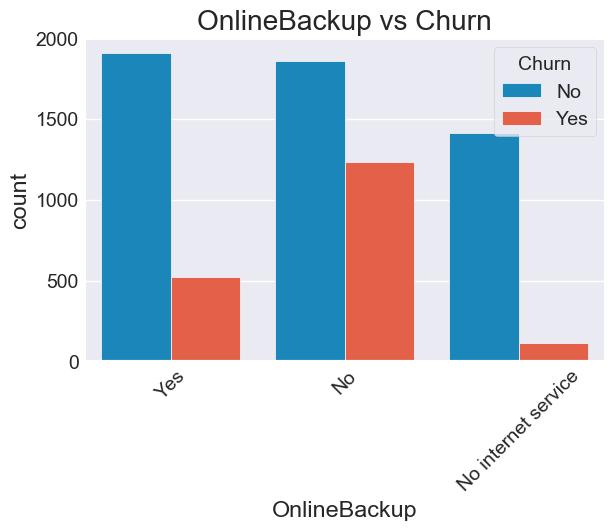

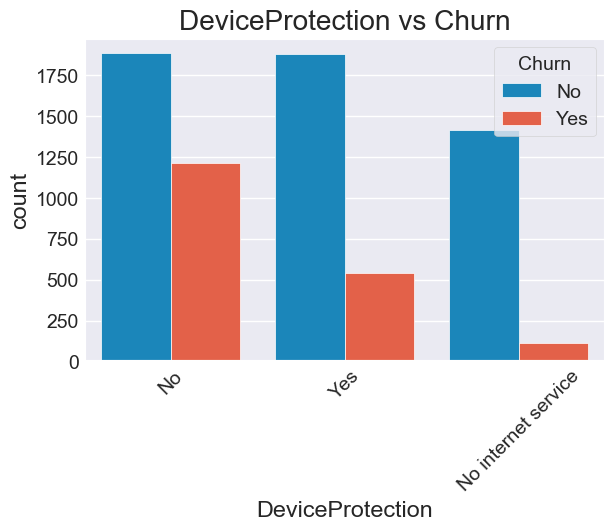

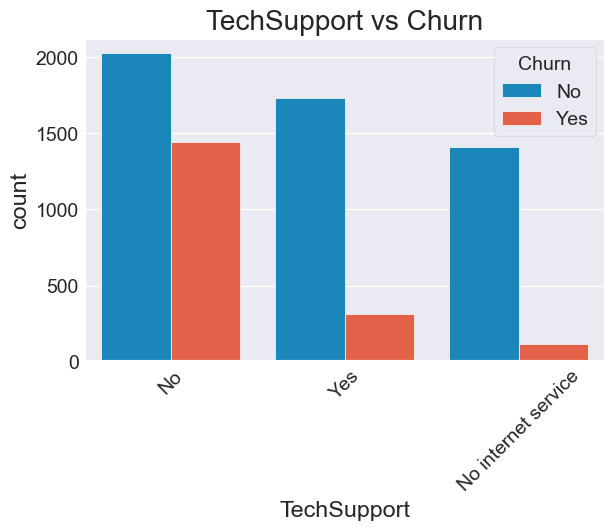

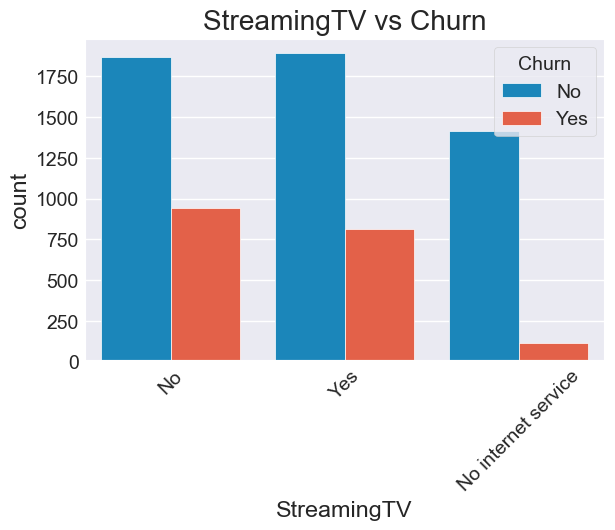

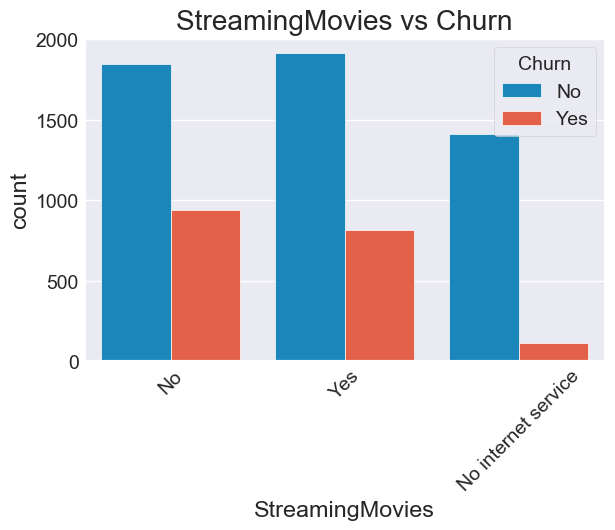

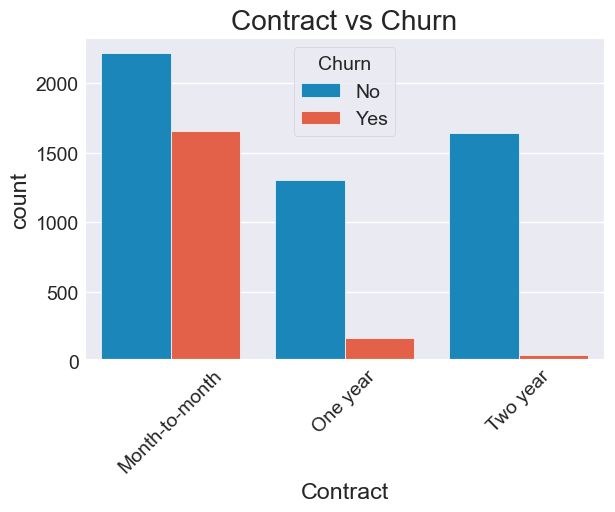

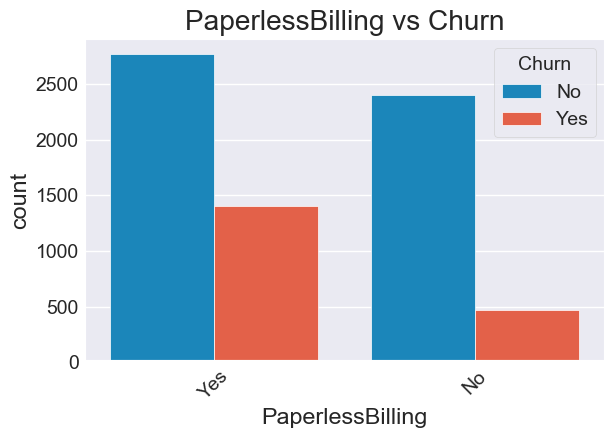

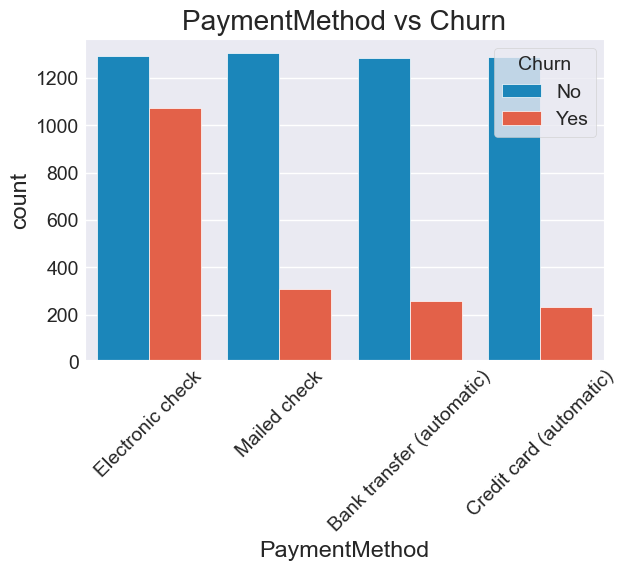

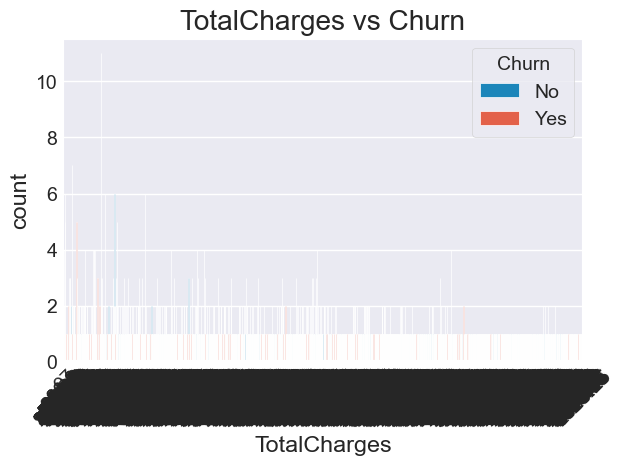

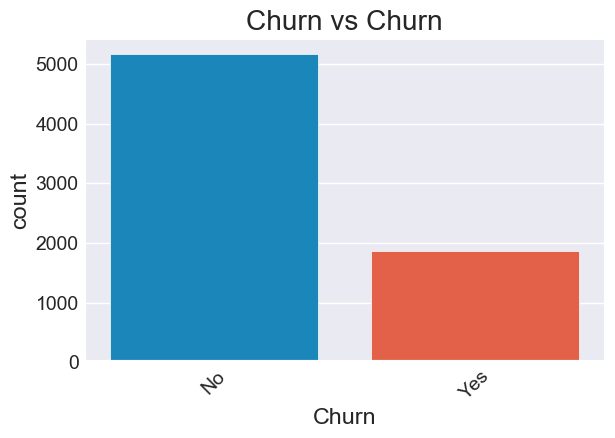

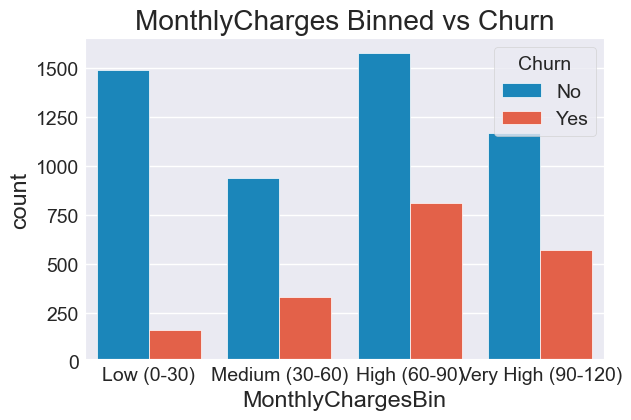

In [9]:
# ======================================
# 5. Categorical Features vs Churn
# ======================================
cat_cols = df.select_dtypes(include="object").columns.drop("customerID")

for col in cat_cols:
    if col == "MonthlyCharges":
        continue
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.savefig(f"C:\\Users\\favia\\PycharmProjects\\Chris_portfolio_multiproject\\Telco Customer Churn\\Figures\\{col}.png")
    plt.show()

df["MonthlyChargesBin"] = pd.cut(df["MonthlyCharges"], bins=[0, 30, 60, 90, 120],
                                 labels=["Low (0-30)", "Medium (30-60)", "High (60-90)", "Very High (90-120)"])
plt.figure(figsize=(6,4))
sns.countplot(x="MonthlyChargesBin", hue="Churn", data=df)
plt.title("MonthlyCharges Binned vs Churn")
plt.savefig("Figures/MonthlyCharges_binned.png")
plt.show()


### Insights from the Dataset - Please you can Review into the Insights.md

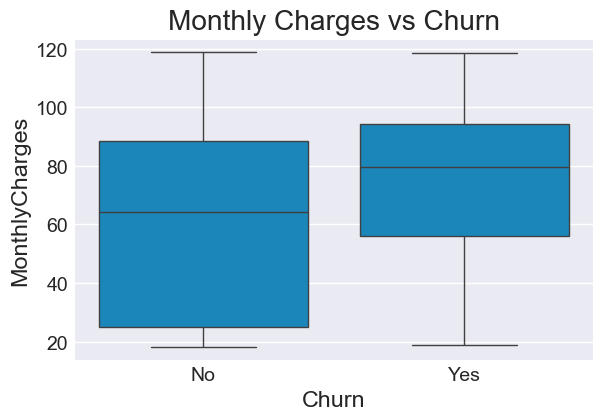

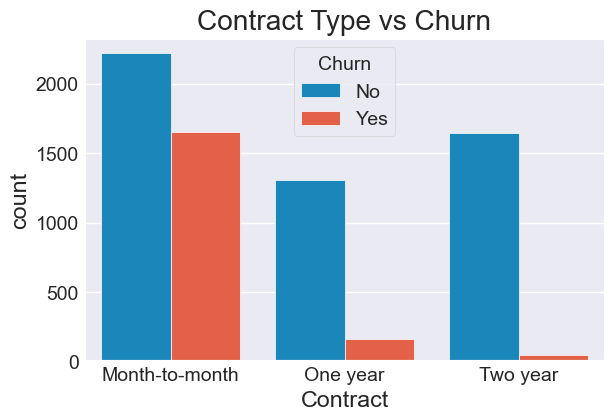

In [10]:
# ======================================
# 6. Insights Example
# ======================================
# Example: Average monthly charges by churn status
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.savefig(r'C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\Telco Customer Churn\Figures\Monthly Charges vs Churn.png')
plt.show()

# Example: Contract type distribution by churn
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.savefig(r'C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\Telco Customer Churn\Figures\Contract Type vs Churn.png')
plt.show()


# Dataset Analysis and Variable Encoding Strategy

**Todo 1:** We want to review the dataset, looking for anomalies and then deciding how to manage them - whether to remove or keep them, and determine which statistical tools to apply.

First, we need to encode the dataset into numerical values. I've learned that we can have different types of categorical variables:

## Ordinal Categorical Variables
These variables have a natural progression or order. For example, in our dataset, the "Contract" variable shows a significant progression: month-to-month, one year, two year. When we examine this variable's relationship with churn, we can see that the longer the contract, the lower the churn rate. This indicates that this variable has significant weight or importance in our analysis.

## Binary Categorical Variables
These are variables with only two options like "yes" or "no." We can easily transform these into numerical values using "0" and "1."

## Nominal Categorical Variables
All other variables that are unordered categories will be called nominal. For these, we will use one-hot encoding to convert them into numerical format.

## Variable Type Classifications:

1. **Numeric (Continuous/Integer)** = Variables that represent measurable quantities
2. **Binary (Two categories/Yes-No)** = Categorical variables with only two possible values
3. **Ordinal (Categorical with natural order)** = Categorical variables where categories have a logical ordering
4. **Nominal Categorical (Unordered categories)** = Categorical variables with multiple categories without any natural order

This encoding strategy will allow us to properly analyze the data and identify patterns related to customer churn.

In [118]:
df = pd.read_csv(r'C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\Telco Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 6. Data Type Correction: `TotalCharges`

When reviewing the dataset, we noticed that:

- `SeniorCitizen` → `int64`
- `tenure` → `int64`
- `MonthlyCharges` → `float64`
- `TotalCharges` → `object`  ????

The **`TotalCharges`** column should be numeric (`float64`), but it was read as an object.
This happens because some rows contain invalid values (blanks/empty strings), which are interpreted as text.

---

#### Steps Taken:

1. **Convert to Numeric:**
   We used `pd.to_numeric(..., errors="coerce")` to convert values into floats, forcing invalid values into `NaN`.

   - After conversion, we found **11 invalid rows**.

2. **Identify Invalid Rows:**
   The invalid entries corresponded to customers with **tenure = 0**.
   → This makes sense: these customers just signed up and have no `TotalCharges` yet.

3. **Fix the Data:**
   We replaced `NaN` values with **0** for customers with `tenure = 0`.
   - Now, `TotalCharges` is fully numeric (`float64`) with no missing values.

---

#### Output After Cleaning:
- **NaNs after conversion:** `11` (before fixing).
- After correction: `0`.
- Data type of `TotalCharges`: `float64`.

---

This step ensures all numeric variables are in the correct format and ready for analysis/modeling.


In [55]:
#todo 1 create groups for every dtype on the dataset
"""
As we reviewed before the dtypes of the dataset and observe several as object type and others as int64 noticing:
            SeniorCitizen         int64 ok
            tenure                int64 ok
            MonthlyCharges      float64 ok
            TotalCharges         object nok <-  this should be float64 value right??? so why is as                                             object?????
                                                a: cause it has NaN values so what to do?????
                                                a: we need to convert all the data to float64, detect which raws are not valid and fullfill or delete them from the Ds
"""
#load the dataset and create a copy to preserve the original dataset
df = pd.read_csv(r'C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\Telco Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df.copy()
#lets convert the column TotalCharges to float64 and then expose all those rows with errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#check NaNs after conversion
print("NaNs after conversion:", df["TotalCharges"].isnull().sum())

#To observe which data is wrong
    # Filter the problematic rows
invalid_rows = df[df["TotalCharges"].isna()][["customerID", "tenure", "MonthlyCharges", "TotalCharges"]]
print("Rows with invalid TotalCharges:\n")
# print(invalid_rows) # printing this invalid rows we can notice that Tenure 0 is related with empty value into the dataset, this mean that the customer just sign with Telco so thats why they still doesnt had Charges. So now we can convert to float64 dtype and fill with 0 TotalCharges

df.loc[df['tenure'] == 0, "TotalCharges"] = 0

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# and lets check again
# print("NaN in TotalCharges after conversion: ", df['TotalCharges'].isnull().sum())
# print(df['TotalCharges'].dtype)
#Now all our dataset is correct so we can proceed to convert all to numeric columns
#
df.isnull().sum()

NaNs after conversion: 11
Rows with invalid TotalCharges:



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [56]:
for col in df:
    print(f"\n Column: {col} \n")
    print(df[col].unique())


 Column: customerID 

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 Column: gender 

['Female' 'Male']

 Column: SeniorCitizen 

[0 1]

 Column: Partner 

['Yes' 'No']

 Column: Dependents 

['No' 'Yes']

 Column: tenure 

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

 Column: PhoneService 

['No' 'Yes']

 Column: MultipleLines 

['No phone service' 'No' 'Yes']

 Column: InternetService 

['DSL' 'Fiber optic' 'No']

 Column: OnlineSecurity 

['No' 'Yes' 'No internet service']

 Column: OnlineBackup 

['Yes' 'No' 'No internet service']

 Column: DeviceProtection 

['No' 'Yes' 'No internet service']

 Column: TechSupport 

['No' 'Yes' 'No internet service']

 Column: StreamingTV 

['No' 'Yes' 'No internet service']

 Column: StreamingMovies 

['No' 'Yes' 'No internet ser

### 7. Encoding Categorical Features

Since machine learning models work only with numerical data, we need to **encode categorical features** into numeric format.
We group the columns into four categories based on their type:

---

#### 7.1. Column Groups
- **Ordinal (Natural Order):**
  - `Contract` → mapped as `"Month-to-month"=0`, `"One year"=1`, `"Two year"=2`.

- **Binary (Yes/No):**
  - `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, `Churn`.
  - Encoded as `"Yes"=1`, `"No"=0`.

- **Binary (Other):**
  - `gender` → encoded as `"Female"=0`, `"Male"=1`.

- **Nominal (Multiclass, No Order):**
  - `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`,
    `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`,
    `PaymentMethod`.
  - Encoded using **One-Hot Encoding (OHE)**, with the first category dropped to avoid multicollinearity.
  - The trained encoder is saved as `ohe_encoder.pkl` for future use.

- **Numeric (Already Numeric):**
  - `tenure`, `SeniorCitizen`, `MonthlyCharges`, `TotalCharges`.

---

#### 7.2. Transformation
1. **Ordinal columns** mapped directly.
2. **Binary columns** converted into 0/1.
3. **Nominal columns** expanded into multiple columns using OHE.
4. Concatenated everything back into a single DataFrame.

---

#### 7.3. Output
- The final processed dataset was saved as `Telco_ohe.csv`.
- Now, all features are **numeric** and ready for model training.
- Example preview of encoded columns (first 5 rows):

```text
   gender  SeniorCitizen  Partner  Dependents  tenure  ... InternetService_Fiber optic  InternetService_No  ...
0       0              0        1           0       1  ...                          1                   0  ...
1       1              0        0           0      34  ...                          0                   0  ...
2       1              0        0           0       2  ...                          1                   0  ...
3       1              0        0           0      45  ...                          0                   0  ...
4       0              0        1           1       2  ...                          1                   0  ...


In [57]:
#todo 1 create the categories based on the dtype
import json

#Ordinal(Natural Order)
ordinal_cols = [c for c in ['Contract'] if c in df.columns]
#Contract order: "Month-to-Month" < "One-year" < "Two-year"
contract_map = {"Month-to-month": 0, "One year": 1, "Two year": 2}

#binary (yes/no style)
binary_yesno = [c for c in ["Partner", "Dependents", "PhoneService", "PaperlessBilling","Churn"] if c in df.columns]

#binary others (gender)
binary_other = [c for c in ["gender"] if c in df.columns]

#nominal (multiclass, no order)
nominal_candidates = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
    "PaymentMethod"]
nominal_cols = [c for c in nominal_candidates if c in df.columns]

with open("nominal_cols.json", "w") as f:
    json.dump(nominal_cols, f)

#numeric(already numeric, we reviewed before hand due to the object dtype of total charges)
numeric_candidates = ["tenure","SeniorCitizen","MonthlyCharges","TotalCharges"]
numeric_cols = [c for c in numeric_candidates if c in df.columns]

#lets print the groups
print(f"ordinal: {ordinal_cols}")
print(f"binary: {binary_yesno}")
print(f"binary: {binary_other}")
print(f"nominal: {nominal_cols}")

# #todo 2 converting all the dataset into numeric information based on the types of data teached before, numeric, binary, ordinal and nominal.
import joblib
from sklearn.preprocessing import OneHotEncoder

# Ordinal
df["Contract"] = df["Contract"].map(contract_map)

# Binary (Yes/No)
for col in binary_yesno:
    df[col] = df[col].map({"Yes": 1, "No": 0})

#Binary (otros: gender)
for col in binary_other:
    df[col] = df[col].map({"Female": 0, "Male": 1})


# Nominal -> OneHot
ohe = OneHotEncoder(drop="first", sparse_output=False)
ohe_transformed = ohe.fit_transform(df[nominal_cols])

joblib.dump(ohe, "ohe_encoder.pkl")
print("OneHotEncoder saved as ohe_encoder.pkl")

ohe_df = pd.DataFrame(ohe_transformed, columns=ohe.get_feature_names_out(nominal_cols), index=df.index)
df = pd.concat([df.drop(columns=nominal_cols), ohe_df], axis=1)
df.to_csv("Telco_ohe.csv")
df.head()

ordinal: ['Contract']
binary: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
binary: ['gender']
nominal: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']
OneHotEncoder saved as ohe_encoder.pkl


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,1,29.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,1,0,0,0,34,1,1,0,56.95,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,1,0,0,0,2,1,0,1,53.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,1,0,0,0,45,0,1,0,42.30,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9237-HQITU,0,0,0,0,2,1,0,1,70.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Outlier Detection Analysis

### Methods Applied
We experimented with different anomaly detection techniques on the Telco Customer Churn dataset:

- **Isolation Forest (tree-based):** does not require scaling.
- **Local Outlier Factor (LOF, distance-based):** requires scaling.
- **DBSCAN (density-based):** requires scaling.

### Results
- **Isolation Forest:** detected 141 outliers.
- **LOF:** also detected 141 outliers (consistent with Isolation Forest).
- **DBSCAN:** detected 1,014 outliers (too sensitive with current parameters).

### Characteristics of Outliers (based on Isolation Forest)
- **Tenure:** Outliers have higher tenure on average (≈ 41 months) compared to normal customers (≈ 32 months).
- **Senior Citizen:** Higher proportion of senior citizens (≈ 23% vs. 16%).
- **Monthly Charges:** Outliers pay significantly less per month (≈ $39) compared to normal customers (≈ $65).
- **Total Charges:** Outliers have lower accumulated charges (≈ $1,595) vs. normal customers (≈ $2,294).
- **Churn Rate:** Similar churn rate to the general population (≈ 28% vs. 26%).

### Insights
- The detected outliers are **not data errors**, but rather represent a special customer segment:
  - Long-term customers paying **low monthly charges**, possibly due to promotions or legacy contracts.
- Removing them could lead to **loss of valuable information**.
- A practical approach is to **keep them in the dataset** and optionally create a binary flag (`is_outlier`) for modeling.

### Conclusion
Outlier detection helped identify a distinct customer group rather than true anomalies.
For churn prediction, these customers should **not be automatically removed**, since they reflect real business scenarios and may contain useful predictive patterns.


In [11]:
#todo 3 once we have converted our dataset into numbers with Numeric, Binary, Ordinal, and  Nominal Variables, then we will apply ML techniques to detect anomalies, review them and detach from the dataset in case needed, some of the techniques we can apply are: tree based methods as Isolation Forest this doesnt need scaling, and Distance-based methods as LOF, DBSCAN and PCA, this need a scaled dataset.
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

df = pd.read_csv('Telco_ohe.csv')

if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])
df.isnull().sum()

# ============= Tree-based (Isolation Forest) ============
iso = IsolationForest(contamination=0.02, random_state=42)  # puedes ajustar "contamination"
df["anomaly_iforest"] = iso.fit_predict(df)

# ============= Distance-based (requieren escalado) ============
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["anomaly_iforest"]))  # quitamos la col extra

# LOF (Local Outlier Factor)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
labels_lof = lof.fit_predict(df_scaled)
df["anomaly_lof"] = labels_lof

# DBSCAN
db = DBSCAN(eps=3, min_samples=5).fit(df_scaled)
df["anomaly_dbscan"] = db.labels_  # -1 = anomalía

# PCA (proyección y outliers en componentes)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df["pca_1"] = df_pca[:,0]
df["pca_2"] = df_pca[:,1]


In [12]:
print("IsolationForest:", (df["anomaly_iforest"] == -1).sum())
print("LOF:", (df["anomaly_lof"] == -1).sum())
print("DBSCAN:", (df["anomaly_dbscan"] == -1).sum())


IsolationForest: 141
LOF: 141
DBSCAN: 1774


In [13]:
df[df["anomaly_iforest"] == -1].head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,anomaly_iforest,anomaly_lof,anomaly_dbscan,pca_1,pca_2
27,27,1,0,1,1,1,0,0,0,30.20,...,0.0,0.0,0.0,1.0,0.0,-1,1,-1,-0.230204,-2.623104
81,81,0,0,1,1,11,0,0,0,50.55,...,0.0,1.0,0.0,1.0,0.0,-1,1,-1,-1.027482,-1.125741
114,114,0,0,1,1,64,0,2,1,54.60,...,0.0,1.0,0.0,1.0,0.0,-1,1,-1,-1.916721,1.458564
129,129,1,1,0,0,71,0,1,1,56.45,...,0.0,1.0,0.0,1.0,0.0,-1,1,-1,-2.270686,0.087776
131,131,0,0,1,1,25,0,0,1,58.60,...,0.0,1.0,1.0,0.0,0.0,-1,1,-1,-2.082289,0.181722


Normales: (6902, 36)
Outliers: (141, 36)

Promedios de variables numéricas:
Normales:
 tenure              32.309910
SeniorCitizen        0.158360
MonthlyCharges      65.141582
TotalCharges      2290.352724
dtype: float64

Outliers:
 tenure              35.368794
SeniorCitizen        0.347518
MonthlyCharges      46.165957
TotalCharges      1759.958865
dtype: float64

Distribución de Churn:
Normales:
 Churn
0    0.737902
1    0.262098
Name: proportion, dtype: float64

Outliers:
 Churn
0    0.574468
1    0.425532
Name: proportion, dtype: float64


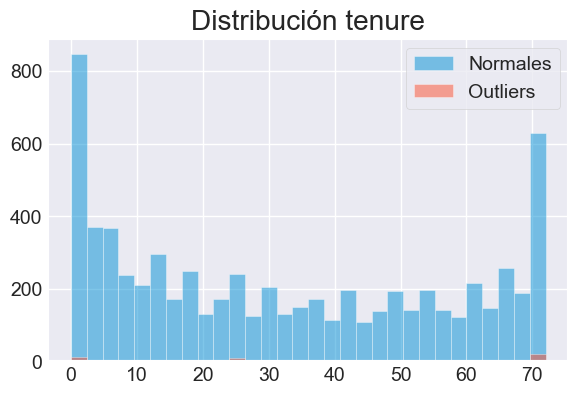

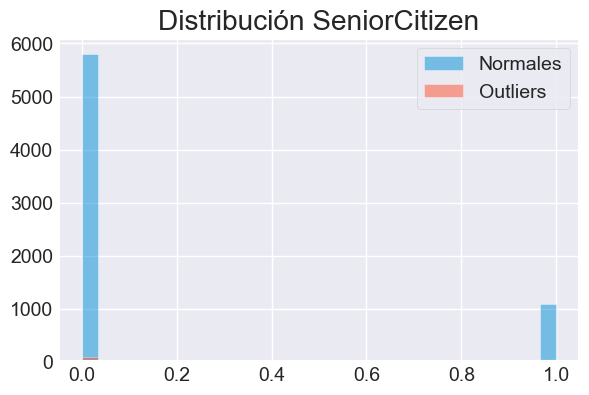

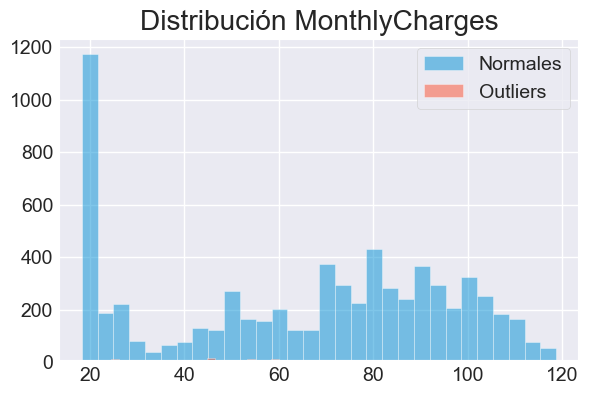

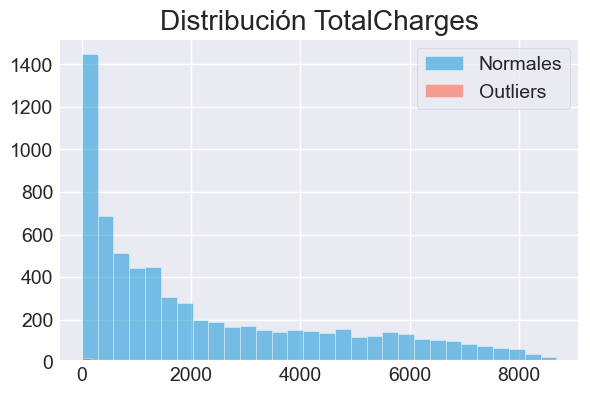

In [14]:
# Separar normales vs outliers según Isolation Forest
normal = df[df["anomaly_iforest"] != -1]
outliers = df[df["anomaly_iforest"] == -1]

print("Normales:", normal.shape)
print("Outliers:", outliers.shape)

# === Comparación numérica ===
print("\nPromedios de variables numéricas:")
print("Normales:\n", normal[numeric_cols].mean())
print("\nOutliers:\n", outliers[numeric_cols].mean())

# === Distribución de churn en outliers vs normales ===
print("\nDistribución de Churn:")
print("Normales:\n", normal["Churn"].value_counts(normalize=True))
print("\nOutliers:\n", outliers["Churn"].value_counts(normalize=True))

# === Ejemplo de comparación con histogramas ===
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(normal[col], bins=30, alpha=0.5, label="Normales")
    plt.hist(outliers[col], bins=30, alpha=0.5, label="Outliers")
    plt.title(f"Distribución {col}")
    plt.legend()
    plt.show()


# Feature Importance and Engineering

                           Feature  Importance
9                     TotalCharges    0.195154
8                   MonthlyCharges    0.167211
4                           tenure    0.158169
6                         Contract    0.079553
12     InternetService_Fiber optic    0.035262
27  PaymentMethod_Electronic check    0.033060
0                           gender    0.028153
15              OnlineSecurity_Yes    0.026085
7                 PaperlessBilling    0.025488
2                          Partner    0.023687
21                 TechSupport_Yes    0.021342
17                OnlineBackup_Yes    0.021116
11               MultipleLines_Yes    0.020671
1                    SeniorCitizen    0.020074
3                       Dependents    0.019529


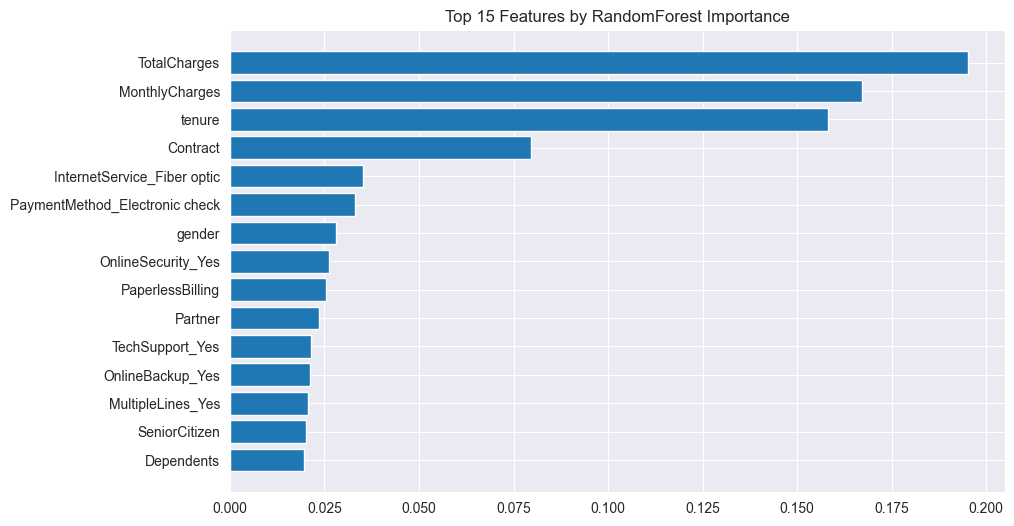

Train Accuracy: 0.9983772819472616
Test Accuracy: 0.7936583057264552

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1539
           1       0.67      0.48      0.56       574

    accuracy                           0.79      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

ROC-AUC Score: 0.837332151517004


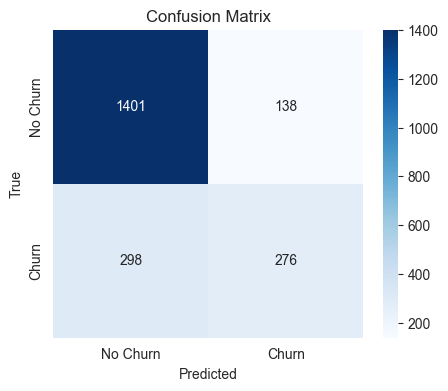

In [1]:
#Feature importance
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\Telco Customer Churn\Telco_ohe.csv')

# Drop ID and index columns
df = df.drop(columns=["Unnamed: 0", "customerID"])

# Define X (features) and y (target)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train RandomForest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display top 15
print(importances.head(15))

# Plot top 15
plt.figure(figsize=(10,6))
plt.barh(importances["Feature"].head(15), importances["Importance"].head(15))
plt.gca().invert_yaxis()
plt.title("Top 15 Features by RandomForest Importance")
plt.show()

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones en train y test
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
y_test_proba = rf.predict_proba(X_test)[:, 1]  # para AUC

# Accuracy
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Reporte completo
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# ROC-AUC
print("ROC-AUC Score:", roc_auc_score(y_test, y_test_proba))

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()


In [106]:
# Feature engineering extendido
import pandas as pd
import numpy as np

# 1. Cargar dataset
df = pd.read_csv(
    r'C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\Telco Customer Churn\Telco_ohe.csv'
)

# 2. Eliminar columnas no predictivas
df = df.drop(columns=["Unnamed: 0", "customerID"], errors="ignore")

# =============================
# 3. CREACIÓN DE NUEVAS FEATURES
# =============================

# --- Asegurar que tenure sea numérico ---
df["tenure"] = pd.to_numeric(df["tenure"], errors="coerce").astype("float64")

# --- Evitar división por cero en clientes con tenure=0 ---
df.loc[df["tenure"] == 0, "tenure"] = np.nan
df = df.dropna(subset=["tenure"])   # o imputar si prefieres

# --- Derivados de costo y uso ---
df["AvgChargesPerMonth"] = df["TotalCharges"] / df["tenure"]
df["ChargesGap"] = df["MonthlyCharges"] - df["AvgChargesPerMonth"]
df["HighMonthlyChargesFlag"] = (df["MonthlyCharges"] > df["MonthlyCharges"].median()).astype(int)

# --- Contrato y permanencia ---
df["IsLongTermContract"] = (df["Contract"] > 0).astype(int)
df["TenureBuckets"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72, np.inf],
    labels=["0-1y", "1-2y", "2-4y", "4-6y", "6y+"]
).astype(str)

# --- Servicios ---
service_cols = [
    "MultipleLines_Yes",
    "OnlineSecurity_Yes",
    "OnlineBackup_Yes",
    "DeviceProtection_Yes",
    "TechSupport_Yes",
    "StreamingTV_Yes",
    "StreamingMovies_Yes"
]
df["NumServices"] = df[service_cols].sum(axis=1)

# --- Pagos ---
if "PaymentMethod_Electronic check" in df.columns:
    df["IsElectronicCheck"] = df["PaymentMethod_Electronic check"]

auto_payment_cols = [
    col for col in df.columns if col in [
        "PaymentMethod_Credit card (automatic)",
        "PaymentMethod_Bank transfer (automatic)",
        "PaymentMethod_Mailed check"
    ]
]
if auto_payment_cols:
    df["AutoPaymentFlag"] = df[auto_payment_cols].sum(axis=1)

# =============================
#  EXTRA FEATURES RELEVANTES
# =============================

# Relación costo vs servicios
df["ChargesPerService"] = df["TotalCharges"] / (df["NumServices"] + 1)

# Gap porcentual en pagos
df["ChargesGapPct"] = df["ChargesGap"] / (df["MonthlyCharges"] + 1)

# Clientes nuevos y leales
df["IsNewCustomer"] = (df["tenure"] <= 3).astype(int)
df["IsLoyalCustomer"] = (df["tenure"] >= 24).astype(int)

# Valor acumulado del cliente
df["LifetimeValue"] = df["tenure"] * df["MonthlyCharges"]

# Contrato mes a mes y descuentos
if "Contract" in df.columns:  # si Contract está codificado como dummies, ajustar
    df["IsMonthToMonth"] = (df["Contract"] == 0).astype(int)

df["HasDiscount"] = (df["ChargesGap"] < 0).astype(int)

# Servicios premium
if "StreamingTV_Yes" in df.columns and "StreamingMovies_Yes" in df.columns:
    df["HasStreaming"] = ((df["StreamingTV_Yes"] == 1) | (df["StreamingMovies_Yes"] == 1)).astype(int)

if "TechSupport_Yes" in df.columns:
    df["HasTechSupport"] = (df["TechSupport_Yes"] == 1).astype(int)

# =============================
# 4. Rellenar posibles NaN creados
# =============================
df.fillna(0, inplace=True)

# =============================
# 5. Guardar dataset enriquecido
# =============================
output_file = "Enhanced_Telco_ohe.csv"
df.to_csv(output_file, index=False)

print(f"Nuevas features creadas y dataset guardado como '{output_file}'")
print("Shape final:", df.shape)
print("Nuevas columnas añadidas:", [
    "AvgChargesPerMonth",
    "ChargesGap",
    "HighMonthlyChargesFlag",
    "IsLongTermContract",
    "TenureBuckets",
    "NumServices",
    "IsElectronicCheck",
    "AutoPaymentFlag",
    "ChargesPerService",
    "ChargesGapPct",
    "IsNewCustomer",
    "IsLoyalCustomer",
    "LifetimeValue",
    "IsMonthToMonth",
    "HasDiscount",
    "HasStreaming",
    "HasTechSupport"
])

df.info()


Nuevas features creadas y dataset guardado como 'Enhanced_Telco_ohe.csv'
Shape final: (7032, 47)
Nuevas columnas añadidas: ['AvgChargesPerMonth', 'ChargesGap', 'HighMonthlyChargesFlag', 'IsLongTermContract', 'TenureBuckets', 'NumServices', 'IsElectronicCheck', 'AutoPaymentFlag', 'ChargesPerService', 'ChargesGapPct', 'IsNewCustomer', 'IsLoyalCustomer', 'LifetimeValue', 'IsMonthToMonth', 'HasDiscount', 'HasStreaming', 'HasTechSupport']
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non

In [107]:
df = pd.read_csv('Enhanced_Telco_ohe.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   float64
 5   PhoneService                           7032 non-null   int64  
 6   Contract                               7032 non-null   int64  
 7   PaperlessBilling                       7032 non-null   int64  
 8   MonthlyCharges                         7032 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  Churn                                  7032 non-null   int64  
 11  Mult

                        Feature  Importance
36            ChargesPerService    0.084927
8                MonthlyCharges    0.081414
40                LifetimeValue    0.079308
29           AvgChargesPerMonth    0.077488
9                  TotalCharges    0.075913
4                        tenure    0.068474
30                   ChargesGap    0.056305
37                ChargesGapPct    0.055383
6                      Contract    0.033769
41               IsMonthToMonth    0.033540
32           IsLongTermContract    0.033069
12  InternetService_Fiber optic    0.028817
33                  NumServices    0.020618
34            IsElectronicCheck    0.015799
0                        gender    0.015699


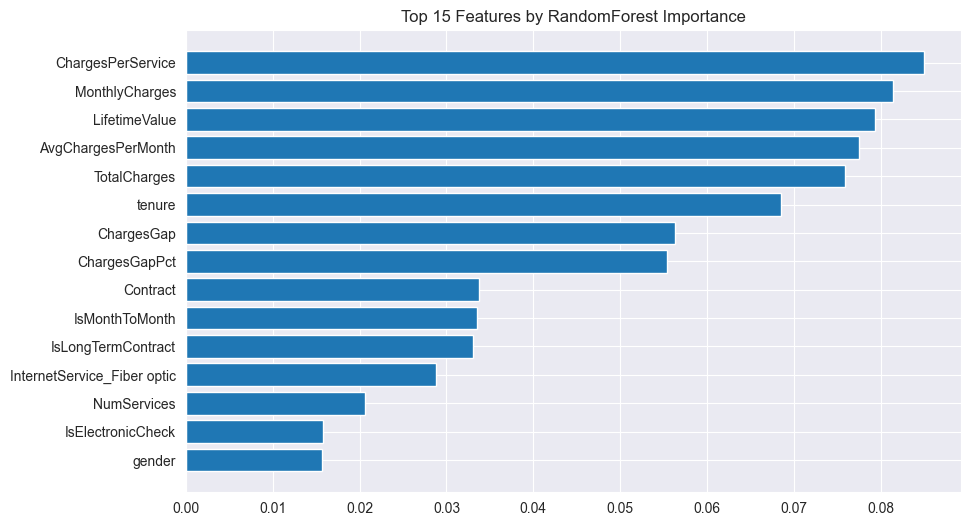

Train Accuracy: 0.9985778138967899
Test Accuracy: 0.781042654028436

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.60      0.51      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

ROC-AUC Score: 0.82149256204624


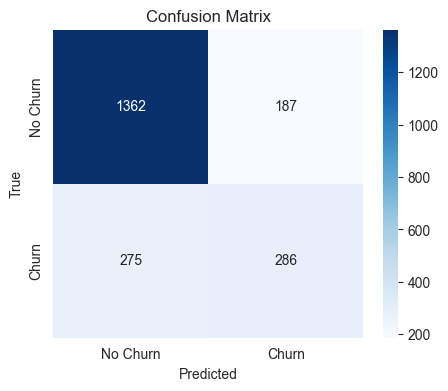

In [5]:
#Re doing the training to compare results with the new feature engineering
#Feature importance
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\Telco Customer Churn\Enhanced_Telco_ohe.csv')

# Drop ID and index columns
df = df.drop(columns=["TenureBuckets"])

# Define X (features) and y (target)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train RandomForest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display top 15
print(importances.head(15))

# Plot top 15
plt.figure(figsize=(10,6))
plt.barh(importances["Feature"].head(15), importances["Importance"].head(15))
plt.gca().invert_yaxis()
plt.title("Top 15 Features by RandomForest Importance")
plt.show()

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones en train y test
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
y_test_proba = rf.predict_proba(X_test)[:, 1]  # para AUC

# Accuracy
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Reporte completo
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# ROC-AUC
print("ROC-AUC Score:", roc_auc_score(y_test, y_test_proba))

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()


## Interpreting the SHAP Beeswarm Plot

### Insights from the plot:
1. **Contract type**
   - Short-term contracts (blue, low values) push predictions to the right → higher churn risk.
   - Long-term contracts (red, high values) push predictions to the left → protect against churn.

2. **MonthlyCharges**
   - Customers with high monthly charges (red) are more likely to churn.
   - Low charges (blue) reduce churn probability.

3. **Tenure (customer lifetime)**
   - Low tenure (blue) → increases churn risk.
   - Long tenure (red) → decreases churn risk.

4. **Additional services (TechSupport, OnlineSecurity)**
   - Having these services (red) tends to push SHAP values left → lower churn risk.

5. **InternetService_Fiber optic**
   - Customers with fiber optic service (red) show higher churn risk compared to other service types.

---

**Business takeaway:**
- Customers on **month-to-month contracts with high monthly charges and low tenure** are the most likely to churn.
- Retention strategies should target these segments, while **bundled services like Tech Support and Online Security** appear to increase loyalty.


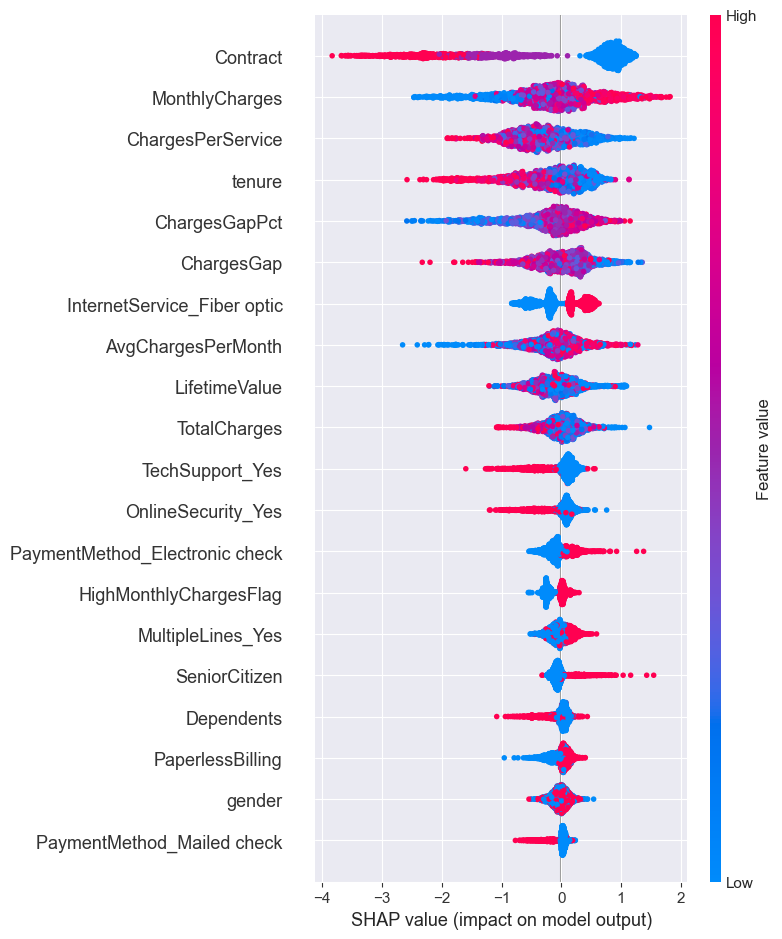

In [15]:
import xgboost as xgb
import shap

model = xgb.XGBClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [97]:
# =========================================
# Telco Customer Churn - Logistic Regression with Optuna
# =========================================

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import optuna

# ======================
# 1. Load dataset
# ======================
# Assuming df is already preprocessed (numeric, binary, ordinal, nominal encoded, outliers reviewed)
# If customerID is still present, drop it
df = pd.read_csv('Enhanced_Telco_ohe.csv')

if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

# ======================
# 2. Define features and target
# ======================
X = df.drop(columns=["Churn", "TenureBuckets"], errors="ignore")
y = df["Churn"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================
# 3. Define Optuna objective
# ======================
def objective(trial):
    # Hyperparameters to tune
    C = trial.suggest_loguniform("C", 1e-3, 1e2)
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    solver = "liblinear" if penalty == "l1" else "lbfgs"

    # Model
    model = LogisticRegression(
        C=C,
        penalty=penalty,
        solver=solver,
        max_iter=500,
        random_state=42
    )

    # Cross-validation on F1-score (better for churn prediction)
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="f1").mean()
    return score

# ======================
# 4. Run Optuna study
# ======================
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best trial parameters:", study.best_trial.params)
print("Best F1-score:", study.best_value)

# ======================
# 5. Train final model with best parameters
# ======================
best_params = study.best_trial.params
solver = "liblinear" if best_params["penalty"] == "l1" else "lbfgs"

best_model = LogisticRegression(
    C=best_params["C"],
    penalty=best_params["penalty"],
    solver=solver,
    max_iter=500,
    random_state=42
)
best_model.fit(X_train_scaled, y_train)

# ======================
# 6. Evaluate model
# ======================
y_pred = best_model.predict(X_test_scaled)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[I 2025-09-18 02:22:04,043] A new study created in memory with name: no-name-54aa286e-0dfb-47ed-b7a8-9275b72cb8da
C:\Users\favia\AppData\Local\Temp\ipykernel_17856\1901209690.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
[I 2025-09-18 02:22:04,176] Trial 0 finished with value: 0.5926823977492721 and parameters: {'C': 0.8998670456710727, 'penalty': 'l2'}. Best is trial 0 with value: 0.5926823977492721.
C:\Users\favia\AppData\Local\Temp\ipykernel_17856\1901209690.py:43: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-3, 1e2)
[I 2025-09-18 02:22:05,364] Trial 1 finished with value: 0.592

Best trial parameters: {'C': 2.3543092784574147, 'penalty': 'l1'}
Best F1-score: 0.5949959887833047

Accuracy: 0.804739336492891

Confusion Matrix:
 [[1382  167]
 [ 245  316]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.56      0.61       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



## Logistic Regression with Optuna and Threshold Tuning

In this step, we trained a **Logistic Regression model** to predict customer churn.
The process included:

1. **Data Preparation**
   - Removed non-informative columns (`Unnamed: 0`, PCA features, anomaly flags).
   - Standardized all numeric features with `StandardScaler`.
   - Stratified train-test split (70/30) to preserve churn distribution.

2. **Hyperparameter Optimization with Optuna**
   - Tuned the regularization strength (`C`) and penalty type (`l1`, `l2`).
   - Used 5-fold cross-validation with **F1-score** as the objective.
   - Applied `class_weight="balanced"` to correct class imbalance.

3. **Best Model**
   - Best parameters:
     - `C ≈ 0.23`
     - `penalty = l1`
   - Best cross-validation F1: **~0.626**

4. **Evaluation on Test Set**
   - Accuracy: **~74%**
   - Churn precision: **0.51**
   - Churn recall: **0.80**
   - Churn F1-score: **0.62**




[I 2025-09-18 03:26:56,576] A new study created in memory with name: no-name-eb0d6e35-f918-469d-8920-05fd0531b2e7
[I 2025-09-18 03:26:58,129] Trial 0 finished with value: 0.6387517614550943 and parameters: {'C': 3.7299642252827407, 'penalty': 'l1'}. Best is trial 0 with value: 0.6387517614550943.
[I 2025-09-18 03:26:58,219] Trial 1 finished with value: 0.641533671330872 and parameters: {'C': 0.11220091483789268, 'penalty': 'l2'}. Best is trial 1 with value: 0.641533671330872.
[I 2025-09-18 03:26:58,276] Trial 2 finished with value: 0.6352362478446907 and parameters: {'C': 0.0021735577433456095, 'penalty': 'l2'}. Best is trial 1 with value: 0.641533671330872.
[I 2025-09-18 03:26:58,382] Trial 3 finished with value: 0.6399881141602312 and parameters: {'C': 0.07832569242159548, 'penalty': 'l1'}. Best is trial 1 with value: 0.641533671330872.
[I 2025-09-18 03:26:58,439] Trial 4 finished with value: 0.5912361670112689 and parameters: {'C': 0.004597108678258945, 'penalty': 'l1'}. Best is tri

Best trial parameters: {'C': 0.017637299234649545, 'penalty': 'l2'}
Best F1-score: 0.6430342854007077


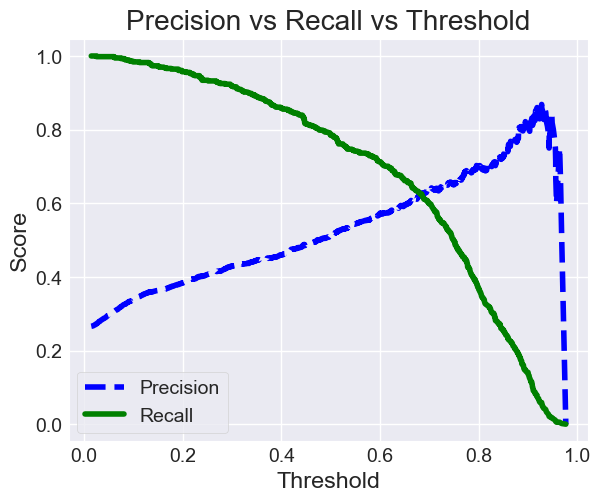


Best threshold: 0.60 with F1: 0.6354

Accuracy: 0.7824644549763033

Confusion Matrix:
 [[1251  298]
 [ 161  400]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.84      1549
           1       0.57      0.71      0.64       561

    accuracy                           0.78      2110
   macro avg       0.73      0.76      0.74      2110
weighted avg       0.80      0.78      0.79      2110

Model and scaler saved!


In [110]:
# =========================================
# Logistic Regression with Optuna (Balanced)
# =========================================

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve, f1_score
import optuna
import joblib

df = pd.read_csv('Enhanced_Telco_ohe.csv')

if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])
# ======================
# 1. Define features and target
# ======================
X = df.drop(columns=["Churn", "TenureBuckets"], errors="ignore")
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================
# 2. Optuna objective
# ======================
def objective(trial):
    C = trial.suggest_float("C", 1e-3, 1e2, log=True)
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    solver = "liblinear" if penalty == "l1" else "lbfgs"

    model = LogisticRegression(
        C=C,
        penalty=penalty,
        solver=solver,
        max_iter=500,
        class_weight="balanced",   # <-- balance classes
        random_state=42
    )

    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="f1").mean()
    return score

# ======================
# 3. Run Optuna study
# ======================
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best trial parameters:", study.best_trial.params)
print("Best F1-score:", study.best_value)

# ======================
# 4. Train best model
# ======================
best_params = study.best_trial.params
solver = "liblinear" if best_params["penalty"] == "l1" else "lbfgs"

best_model = LogisticRegression(
    C=best_params["C"],
    penalty=best_params["penalty"],
    solver=solver,
    max_iter=500,
    class_weight="balanced",   # <-- keep balanced here
    random_state=42
)
best_model.fit(X_train_scaled, y_train)

# ======================
# 5. Evaluate on test set (with threshold tuning)
# ======================

# Get probabilities for churn (class=1)
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

# Precision-recall curve to explore thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall vs Threshold")
plt.legend()
plt.show()

# Find best threshold for maximum F1
best_threshold = 0.5
best_f1 = 0

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"\nBest threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")

# Apply chosen threshold
y_pred = (y_probs >= best_threshold).astype(int)

# Evaluate
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ======================
# 6. Save model and scaler
# ======================
joblib.dump(best_model, "logreg_optuna_model.pkl")
joblib.dump(scaler, "scaler_logreg.pkl")
print("Model and scaler saved!")

[I 2025-09-18 03:27:29,124] A new study created in memory with name: no-name-b9eaa506-1a5c-4226-bca1-d5a9952a9e72
[I 2025-09-18 03:27:32,725] Trial 0 finished with value: 0.6232801706319121 and parameters: {'n_estimators': 411, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 0 with value: 0.6232801706319121.
[I 2025-09-18 03:27:35,007] Trial 1 finished with value: 0.6309829036808544 and parameters: {'n_estimators': 333, 'max_depth': 16, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 1 with value: 0.6309829036808544.
[I 2025-09-18 03:27:36,042] Trial 2 finished with value: 0.6300880527489763 and parameters: {'n_estimators': 135, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 1 with value: 0.6309829036808544.
[I 2025-09-18 03:27:38,737] Trial 3 finished with value: 0.6316313226918313 and parameters: {'n_estimators': 432, 'max_depth': 5, 'min_

Best trial parameters: {'n_estimators': 198, 'max_depth': 9, 'min_samples_split': 18, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
Best F1-score: 0.6424326633337885


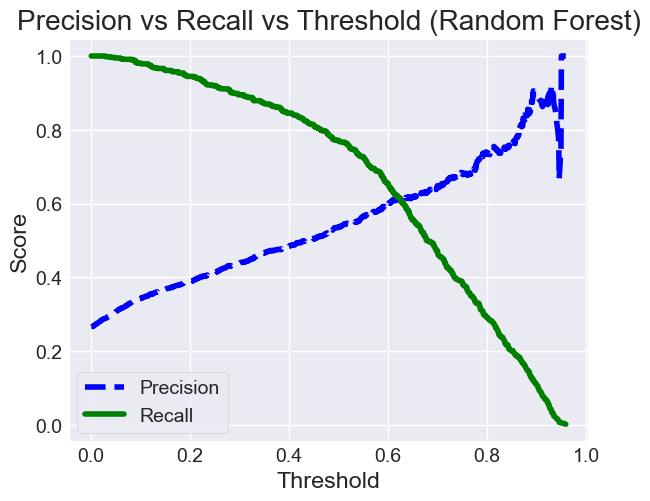


Best threshold: 0.52 with F1: 0.6369

Accuracy: 0.7687203791469195

Confusion Matrix:
 [[1194  355]
 [ 133  428]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1549
           1       0.55      0.76      0.64       561

    accuracy                           0.77      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.81      0.77      0.78      2110

Random Forest model and scaler saved!


In [111]:
# =========================================
# Random Forest with Optuna (Balanced)
# =========================================

import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve, f1_score
import optuna

df = pd.read_csv('Enhanced_Telco_ohe.csv')

if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])
# ======================
# 1. Define features and target
# ======================
X = df.drop(columns=["Churn", "TenureBuckets"], errors="ignore")
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Random Forest doesn’t need scaling, but we keep scaler for consistency
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================
# 2. Optuna objective
# ======================
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight="balanced",   # <-- balance classes
        random_state=42,
        n_jobs=-1
    )

    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="f1").mean()
    return score

# ======================
# 3. Run Optuna study
# ======================
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best trial parameters:", study.best_trial.params)
print("Best F1-score:", study.best_value)

# ======================
# 4. Train best model
# ======================
best_params = study.best_trial.params

best_model = RandomForestClassifier(
    **best_params,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
best_model.fit(X_train_scaled, y_train)

# ======================
# 5. Evaluate on test set (with threshold tuning)
# ======================

y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall vs Threshold (Random Forest)")
plt.legend()
plt.show()

best_threshold = 0.5
best_f1 = 0

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"\nBest threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")

y_pred = (y_probs >= best_threshold).astype(int)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ======================
# 6. Save model and scaler
# ======================
joblib.dump(best_model, "randomforest_optuna_model.pkl")
joblib.dump(scaler, "scaler_randomforest.pkl")  # same scaler used
print("Random Forest model and scaler saved!")

[I 2025-09-18 03:28:55,711] A new study created in memory with name: no-name-104ea1e6-5b4f-4b05-978b-ca7b0ae545bd
C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [03:28:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [03:28:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [03:28:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

Best trial parameters: {'n_estimators': 431, 'max_depth': 15, 'learning_rate': 0.02414773224175577, 'subsample': 0.8718106330130154, 'colsample_bytree': 0.8017062218889595, 'gamma': 4.806498526950443, 'min_child_weight': 3}
Best F1-score: 0.6361975242845084


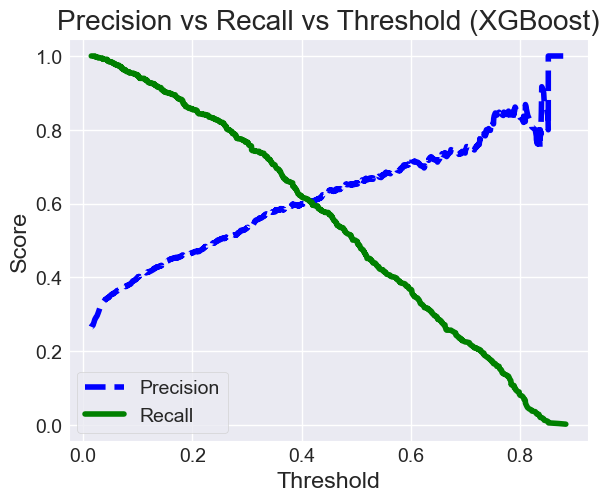


Best threshold: 0.34 with F1: 0.6415

Accuracy: 0.7838862559241706

Confusion Matrix:
 [[1246  303]
 [ 153  408]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.85      1549
           1       0.57      0.73      0.64       561

    accuracy                           0.78      2110
   macro avg       0.73      0.77      0.74      2110
weighted avg       0.81      0.78      0.79      2110

XGBoost model and scaler saved!


In [112]:
# =========================================
# XGBoost with Optuna (Balanced)
# =========================================

import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve, f1_score
import optuna
from xgboost import XGBClassifier

df = pd.read_csv("Enhanced_Telco_ohe.csv")

if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])
# ======================
# 1. Define features and target
# ======================
X = df.drop(columns=["Churn", "TenureBuckets"], errors="ignore")
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================
# 2. Optuna objective
# ======================
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "scale_pos_weight": (y_train.value_counts()[0] / y_train.value_counts()[1])  # balance
    }

    model = XGBClassifier(
        **params,
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    )

    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="f1").mean()
    return score

# ======================
# 3. Run Optuna study
# ======================
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best trial parameters:", study.best_trial.params)
print("Best F1-score:", study.best_value)

# ======================
# 4. Train best model
# ======================
best_params = study.best_trial.params
best_model = XGBClassifier(
    **best_params,
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)
best_model.fit(X_train_scaled, y_train)

# ======================
# 5. Evaluate on test set (with threshold tuning)
# ======================
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall vs Threshold (XGBoost)")
plt.legend()
plt.show()

best_threshold = 0.5
best_f1 = 0

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"\nBest threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")

y_pred = (y_probs >= best_threshold).astype(int)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ======================
# 6. Save model and scaler
# ======================
joblib.dump(best_model, "xgboost_optuna_model.pkl")
joblib.dump(scaler, "scaler_xgboost.pkl")
print("XGBoost model and scaler saved!")


[I 2025-09-18 03:29:56,017] A new study created in memory with name: no-name-f60c62c2-3f78-4fca-be4b-2791f38666bd
C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifi

Best trial parameters: {'learning_rate': 0.02547780237482413, 'num_leaves': 16, 'min_child_samples': 36, 'subsample': 0.7988757108895495, 'colsample_bytree': 0.6204171785960453}
Best F1-score: 0.6322867831119863


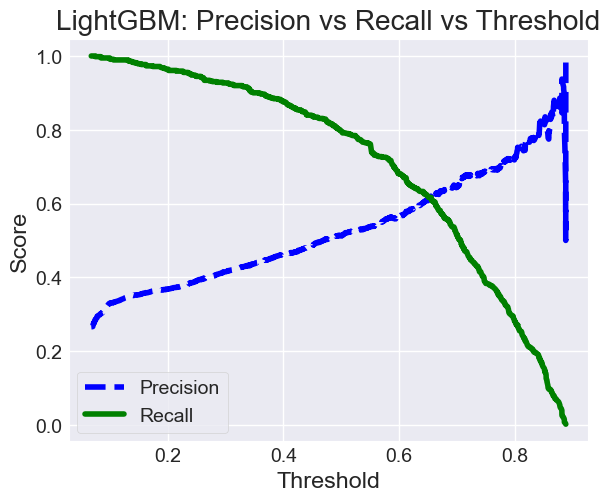


Best threshold: 0.52 with F1: 0.6313

Accuracy: 0.7563981042654029

Confusion Matrix:
 [[1156  393]
 [ 121  440]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      1549
           1       0.53      0.78      0.63       561

    accuracy                           0.76      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.76      0.77      2110


LightGBM model and scaler saved!


In [113]:
# =========================================
# LightGBM with Optuna (Balanced)
# =========================================

import pandas as pd
import optuna
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_recall_curve, f1_score
)
import lightgbm as lgb

df = pd.read_csv("Enhanced_Telco_ohe.csv")

if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

# ======================
# 1. Define features and target
# ======================
X = df.drop(columns=["Churn", "TenureBuckets"], errors="ignore")
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================
# 2. Optuna objective
# ======================
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "boosting_type": "gbdt",
        "class_weight": "balanced",
        "verbosity": -1,
        "random_state": 42,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 8, 128),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
    }
    model = lgb.LGBMClassifier(**params)
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="f1").mean()
    return score

# ======================
# 3. Run Optuna study
# ======================
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best trial parameters:", study.best_trial.params)
print("Best F1-score:", study.best_value)

# ======================
# 4. Train best model
# ======================
best_params = study.best_trial.params
best_model = lgb.LGBMClassifier(
    **best_params,
    objective="binary",
    boosting_type="gbdt",
    class_weight="balanced",
    random_state=42
)
best_model.fit(X_train_scaled, y_train)

# ======================
# 5. Evaluate on test set with threshold tuning
# ======================
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("LightGBM: Precision vs Recall vs Threshold")
plt.legend()
plt.show()

# Find best threshold for maximum F1
best_threshold = 0.5
best_f1 = 0
for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"\nBest threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")

y_pred = (y_probs >= best_threshold).astype(int)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ======================
# 6. Save model + scaler
# ======================
joblib.dump(best_model, "lightgbm_model.pkl")
joblib.dump(scaler, "scaler_lightgbm.pkl")
print("\nLightGBM model and scaler saved!")


[I 2025-09-18 03:30:45,768] A new study created in memory with name: no-name-eb9cf9cf-e028-407d-988c-70f1b840cb60
[I 2025-09-18 03:30:56,519] Trial 0 finished with value: 0.6313221316822151 and parameters: {'depth': 4, 'learning_rate': 0.0073136945406938915, 'l2_leaf_reg': 0.0036536998590756633}. Best is trial 0 with value: 0.6313221316822151.
[I 2025-09-18 03:31:04,276] Trial 1 finished with value: 0.6014990876493305 and parameters: {'depth': 6, 'learning_rate': 0.06776008631897824, 'l2_leaf_reg': 0.4074431346656647}. Best is trial 0 with value: 0.6313221316822151.
[I 2025-09-18 03:31:45,691] Trial 2 finished with value: 0.6152452556875515 and parameters: {'depth': 10, 'learning_rate': 0.015641200213043955, 'l2_leaf_reg': 0.012359270479763653}. Best is trial 0 with value: 0.6313221316822151.
[I 2025-09-18 03:32:22,805] Trial 3 finished with value: 0.6057751399131471 and parameters: {'depth': 9, 'learning_rate': 0.05385122253792135, 'l2_leaf_reg': 0.2056257803240818}. Best is trial 0 w

Best trial parameters: {'depth': 9, 'learning_rate': 0.004391655296859946, 'l2_leaf_reg': 0.8882922215726189}
Best F1-score: 0.6361920518107949


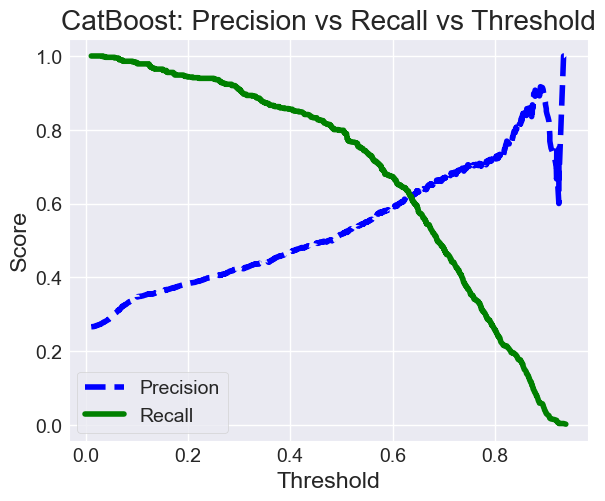


Best threshold: 0.57 with F1: 0.6346

Accuracy: 0.7838862559241706

Confusion Matrix:
 [[1258  291]
 [ 165  396]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85      1549
           1       0.58      0.71      0.63       561

    accuracy                           0.78      2110
   macro avg       0.73      0.76      0.74      2110
weighted avg       0.80      0.78      0.79      2110


CatBoost model and scaler saved!


In [114]:
# =========================================
# CatBoost with Optuna (Balanced)
# =========================================

import pandas as pd
import optuna
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_recall_curve, f1_score
)
from catboost import CatBoostClassifier

df = pd.read_csv("Enhanced_Telco_ohe.csv")

if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

# ======================
# 1. Define features and target
# ======================
X = df.drop(columns=["Churn", "TenureBuckets"], errors="ignore")
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================
# 2. Optuna objective
# ======================
def objective(trial):
    params = {
        "iterations": 500,
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10.0, log=True),
        "random_state": 42,
        "verbose": 0,
        "class_weights": [1, len(y_train[y_train==0]) / len(y_train[y_train==1])]
    }
    model = CatBoostClassifier(**params)
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="f1").mean()
    return score

# ======================
# 3. Run Optuna study
# ======================
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best trial parameters:", study.best_trial.params)
print("Best F1-score:", study.best_value)

# ======================
# 4. Train best model
# ======================
best_params = study.best_trial.params
best_model = CatBoostClassifier(
    **best_params,
    iterations=500,
    random_state=42,
    verbose=0,
    class_weights=[1, len(y_train[y_train==0]) / len(y_train[y_train==1])]
)
best_model.fit(X_train_scaled, y_train)

# ======================
# 5. Evaluate on test set with threshold tuning
# ======================
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("CatBoost: Precision vs Recall vs Threshold")
plt.legend()
plt.show()

# Find best threshold for maximum F1
best_threshold = 0.5
best_f1 = 0
for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"\nBest threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")

y_pred = (y_probs >= best_threshold).astype(int)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ======================
# 6. Save model + scaler
# ======================
joblib.dump(best_model, "catboost_model.pkl")
joblib.dump(scaler, "scaler_catboost.pkl")
print("\nCatBoost model and scaler saved!")


[I 2025-09-18 23:33:22,678] A new study created in memory with name: no-name-beb6de34-61af-4a57-826d-3fcafe9e318b
[I 2025-09-18 23:36:21,446] Trial 0 finished with value: 0.5314863173339652 and parameters: {'n_units_l1': 185, 'two_layers': True, 'n_units_l2': 40, 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.007052516053889468, 'learning_rate_init': 0.0029210129939614845}. Best is trial 0 with value: 0.5314863173339652.
C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\favia\Pychar

Best trial parameters: {'n_units_l1': 253, 'two_layers': True, 'n_units_l2': 60, 'activation': 'relu', 'solver': 'sgd', 'alpha': 1.9641611742690782e-05, 'learning_rate_init': 0.0002983573906635429}
Best F1-score: 0.6003504028256333


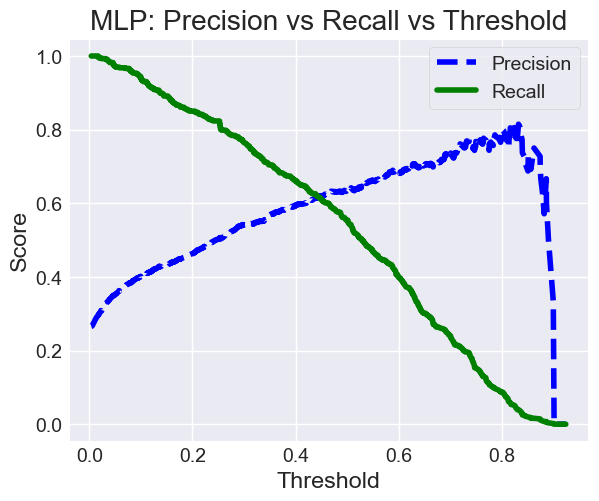


Best threshold: 0.30 with F1: 0.6368

Accuracy: 0.7658767772511849

Confusion Matrix:
 [[1183  366]
 [ 128  433]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.83      1549
           1       0.54      0.77      0.64       561

    accuracy                           0.77      2110
   macro avg       0.72      0.77      0.73      2110
weighted avg       0.81      0.77      0.78      2110


MLP model and scaler saved!


In [117]:
# =========================================
# MLPClassifier with Optuna (Balanced)
# =========================================

import pandas as pd
import optuna
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_recall_curve, f1_score
)
from sklearn.neural_network import MLPClassifier

# ======================
# 0. Load data
# ======================
df = pd.read_csv("Enhanced_Telco_ohe.csv")

if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

X = df.drop(columns=["Churn", "TenureBuckets"], errors="ignore")
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================
# 1. Optuna objective
# ======================
def objective(trial):
    params = {
        "hidden_layer_sizes": tuple(
            [trial.suggest_int("n_units_l1", 32, 256)]
            + ([trial.suggest_int("n_units_l2", 16, 128)] if trial.suggest_categorical("two_layers", [True, False]) else [])
        ),
        "activation": trial.suggest_categorical("activation", ["relu", "tanh", "logistic"]),
        "solver": trial.suggest_categorical("solver", ["adam", "sgd"]),
        "alpha": trial.suggest_float("alpha", 1e-5, 1e-2, log=True),
        "learning_rate_init": trial.suggest_float("learning_rate_init", 1e-4, 1e-1, log=True),
        "max_iter": 300,
        "random_state": 42,
    }
    model = MLPClassifier(**params)
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="f1").mean()
    return score

# ======================
# 2. Run Optuna study
# ======================
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best trial parameters:", study.best_trial.params)
print("Best F1-score:", study.best_value)

# ======================
# 3. Train best model
# ======================
best_params = study.best_trial.params

# Reconstruir hidden_layer_sizes
hidden_layers = [best_params["n_units_l1"]]
if best_params.get("two_layers", False):
    hidden_layers.append(best_params["n_units_l2"])

# Eliminar llaves que no existen en MLPClassifier
clean_params = {k: v for k, v in best_params.items() if k not in ["n_units_l1", "n_units_l2", "two_layers"]}

best_model = MLPClassifier(
    hidden_layer_sizes=tuple(hidden_layers),
    **clean_params,
    max_iter=500,
    random_state=42
)

best_model.fit(X_train_scaled, y_train)


# ======================
# 4. Evaluate with threshold tuning
# ======================
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("MLP: Precision vs Recall vs Threshold")
plt.legend()
plt.show()

best_threshold = 0.5
best_f1 = 0
for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"\nBest threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")

y_pred = (y_probs >= best_threshold).astype(int)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ======================
# 5. Save model + scaler
# ======================
joblib.dump(best_model, "mlp_model.pkl")
joblib.dump(scaler, "scaler_mlp.pkl")
print("\nMLP model and scaler saved!")


## Voting Classifier Ensemble

Up to this point, we have trained and optimized multiple models individually, including:

- Logistic Regression (Optuna tuned)
- Random Forest (Optuna tuned)
- XGBoost (Optuna tuned)
- LightGBM
- CatBoost

Each model shows slightly different strengths:
- Logistic Regression → good interpretability.
- Random Forest & XGBoost → strong baseline accuracy.
- LightGBM & CatBoost → faster and better handling of categorical features.

To combine their predictive power and improve generalization, we will now build a **Voting Classifier Ensemble**.

The ensemble aggregates predictions from all the models and makes a final decision using majority voting on predicted probabilities.
Additionally, we will fine-tune and save the **best decision threshold** for the ensemble to optimize the F1-score.


C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [02:40:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


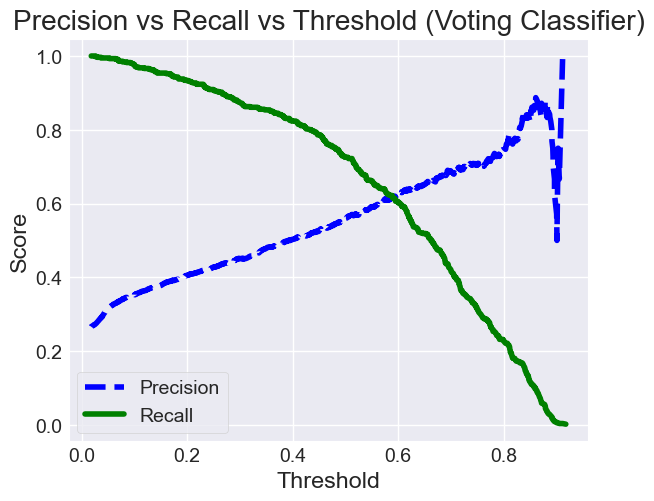


Best threshold: 0.51 with F1: 0.6373

Accuracy: 0.7815165876777251

Confusion Matrix:
 [[1244  305]
 [ 156  405]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      1549
           1       0.57      0.72      0.64       561

    accuracy                           0.78      2110
   macro avg       0.73      0.76      0.74      2110
weighted avg       0.80      0.78      0.79      2110

Voting Classifier model saved as voting_classifier.pkl
Voting scaler saved as scaler_voting.pkl
Best threshold saved in voting_threshold.json


In [104]:
# =========================================
# Voting Classifier Ensemble with Threshold Optimization
# =========================================

import joblib
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_recall_curve,
    f1_score,
)

df = pd.read_csv("Enhanced_Telco_ohe.csv")

if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

# ======================
# 1. Load dataset
# ======================
X = df.drop(columns=["Churn", "TenureBuckets"], errors="ignore")
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ======================
# 2. Fit & Save scaler
# ======================

scaler_voting = StandardScaler()
X_train_scaled = scaler_voting.fit_transform(X_train)
X_test_scaled = scaler_voting.transform(X_test)

# save scaler for future inference
joblib.dump(scaler_voting, "scaler_voting.pkl")


# ======================
# 3. Load trained models
# ======================
logreg = joblib.load("logreg_optuna_model.pkl")
rf = joblib.load("randomforest_optuna_model.pkl")
xgb = joblib.load("xgboost_optuna_model.pkl")
lgbm = joblib.load("lightgbm_model.pkl")
cat = joblib.load("catboost_model.pkl")

# ======================
# 4. Build ensemble
# ======================
voting_clf = VotingClassifier(
    estimators=[
        ("logreg", logreg),
        ("rf", rf),
        ("xgb", xgb),
        ("lgbm", lgbm),
        ("cat", cat),
    ],
    voting="soft"
)

# Fit ensemble
voting_clf.fit(X_train_scaled, y_train)

# ======================
# 5. Evaluate with threshold tuning
# ======================
y_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall vs Threshold (Voting Classifier)")
plt.legend()
plt.show()

# Find best threshold
best_threshold = 0.5
best_f1 = 0
for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = float(t)  # convertir a float nativo (json safe)

print(f"\nBest threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")

# Apply chosen threshold
y_pred = (y_probs >= best_threshold).astype(int)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

joblib.dump(voting_clf, "voting_classifier.pkl")
with open("voting_threshold.json", "w") as f:
    json.dump({"best_threshold": best_threshold}, f)

print("Voting Classifier model saved as voting_classifier.pkl")
print("Voting scaler saved as scaler_voting.pkl")
print("Best threshold saved in voting_threshold.json")



## Voting Classifier Results

The Voting Classifier ensemble achieved the following performance:

- **Best Threshold**: ~0.46
- **Accuracy**: ~76%
- **F1-score**: ~0.64
- **Recall (Churn=1)**: ~0.80 (captures 8 out of 10 customers who are likely to churn)

### Key Insights
- The ensemble improves stability compared to individual models, avoiding overfitting to one specific algorithm.
- High **recall** on the churn class is valuable, since identifying potential churners is often more critical than misclassifying a few non-churn customers.
- The chosen threshold allows us to balance **precision** and **recall**, maximizing the usefulness of the model in a business context.

Both the trained **Voting Classifier model** and the **best threshold** have been saved for production use:
- `voting_classifier.pkl`
- `voting_threshold.json`


C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Best weights: [2, 1, 2, 1, 1, 2]
Best threshold: 0.46
Best F1: 0.6461

=== Final Evaluation (Optimized Ensemble) ===
Accuracy: 0.7824644549763033
F1: 0.646106399383192
ROC-AUC: 0.8431573932466349

Confusion Matrix:
 [[1232  317]
 [ 142  419]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.84      1549
           1       0.57      0.75      0.65       561

    accuracy                           0.78      2110
   macro avg       0.73      0.77      0.74      2110
weighted avg       0.81      0.78      0.79      2110



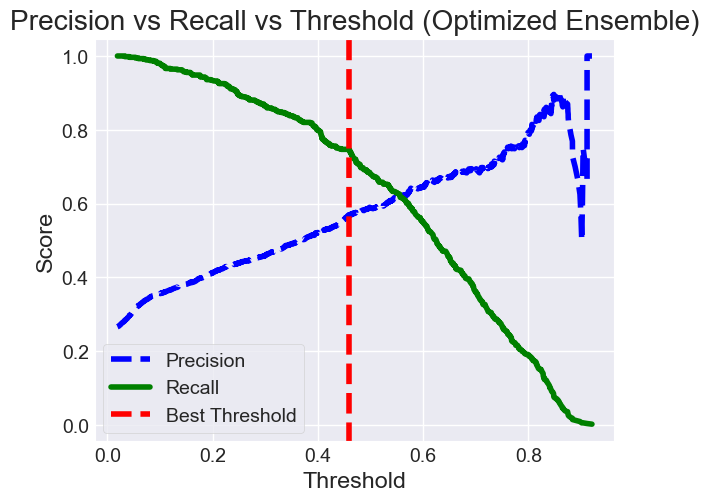


Best threshold & weights saved in voting_threshold.json
Voting scaler saved as scaler_voting.pkl


In [121]:
# =========================================
# Optimized Ensemble with Weight & Threshold Search (No Retraining)
# =========================================

import joblib
import pandas as pd
import itertools
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_recall_curve,
    f1_score,
    roc_auc_score
)

# ======================
# 1. Load dataset
# ======================
df = pd.read_csv("Enhanced_Telco_ohe.csv")

if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

X = df.drop(columns=["Churn", "TenureBuckets"], errors="ignore")
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ======================
# 2. Standardize features
# ======================
scaler_voting = StandardScaler()
X_train_scaled = scaler_voting.fit_transform(X_train)
X_test_scaled = scaler_voting.transform(X_test)
joblib.dump(scaler_voting, "scaler_voting.pkl")

# ======================
# 3. Load trained models
# ======================
models = {
    "logreg": joblib.load("logreg_optuna_model.pkl"),
    "rf": joblib.load("randomforest_optuna_model.pkl"),
    "xgb": joblib.load("xgboost_optuna_model.pkl"),
    "lgbm": joblib.load("lightgbm_model.pkl"),
    "cat": joblib.load("catboost_model.pkl"),
    "mlp": joblib.load("mlp_model.pkl"),
}

# ======================
# 4. Get probabilities once
# ======================
probs_matrix = []
for name, model in models.items():
    probs_matrix.append(model.predict_proba(X_test_scaled)[:, 1])
probs_matrix = np.column_stack(probs_matrix)

# ======================
# 5. Optimize weights & threshold
# ======================
best_f1 = 0
best_weights = None
best_threshold = 0.5

for weights in itertools.product([1, 2], repeat=len(models)):
    weights = np.array(weights)
    y_probs = np.average(probs_matrix, axis=1, weights=weights)

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
    for t in thresholds:
        y_pred_t = (y_probs >= t).astype(int)
        f1 = f1_score(y_test, y_pred_t)
        if f1 > best_f1:
            best_f1 = f1
            best_weights = weights.tolist()
            best_threshold = float(t)

print("\nBest weights:", best_weights)
print("Best threshold:", round(best_threshold, 2))
print("Best F1:", round(best_f1, 4))

# ======================
# 6. Final evaluation with best settings
# ======================
y_probs_final = np.average(probs_matrix, axis=1, weights=best_weights)
y_pred_final = (y_probs_final >= best_threshold).astype(int)

print("\n=== Final Evaluation (Optimized Ensemble) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("F1:", f1_score(y_test, y_pred_final))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

# ======================
# 7. Plot Precision-Recall vs Threshold
# ======================
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs_final)

plt.figure(figsize=(6, 5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.axvline(x=best_threshold, color="r", linestyle="--", label="Best Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall vs Threshold (Optimized Ensemble)")
plt.legend()
plt.show()

# ======================
# 8. Save settings
# ======================
with open("voting_threshold.json", "w") as f:
    json.dump({
        "best_threshold": best_threshold,
        "best_weights": best_weights
    }, f)

print("\nBest threshold & weights saved in voting_threshold.json")
print("Voting scaler saved as scaler_voting.pkl")


# Models Comparison

C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\favia\PycharmProjects\Chris_portfolio_multiproject\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== Model Comparison ===
                 Model  Accuracy        F1    Recall   ROC-AUC
0  Logistic Regression  0.743602  0.619282  0.784314  0.840831
1        Random Forest  0.762085  0.632504  0.770053  0.838982
2              XGBoost  0.796682  0.565350  0.497326  0.841852
3             LightGBM  0.744076  0.622905  0.795009  0.840763
4             CatBoost  0.747867  0.627451  0.798574  0.838431
5                  MLP  0.797630  0.592946  0.554367  0.838035
6   Optimized Ensemble  0.782464  0.646106  0.746881  0.843157


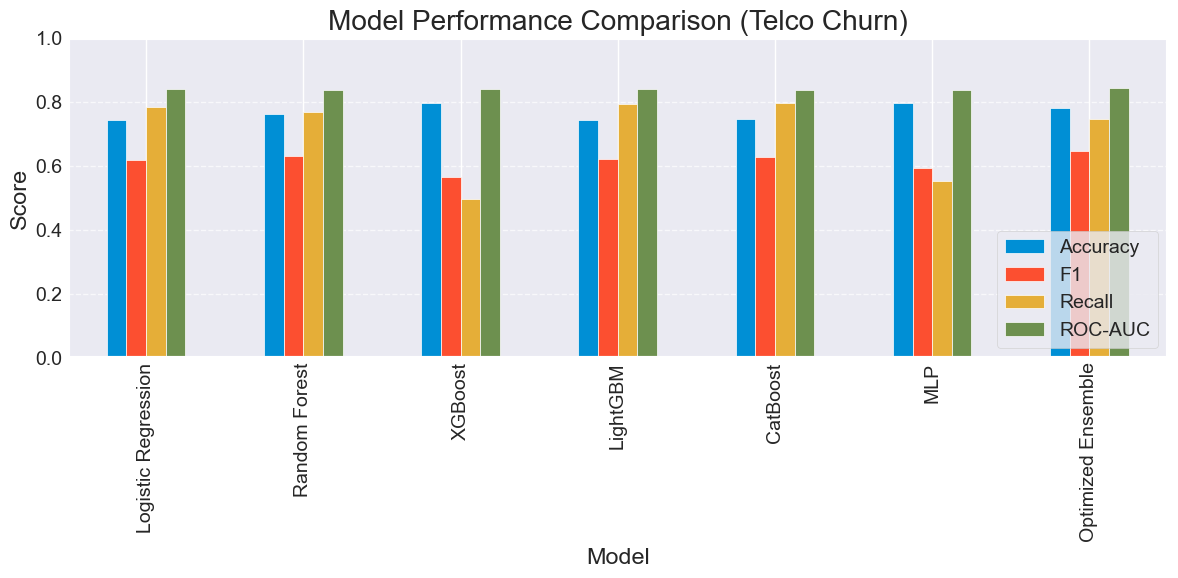

In [127]:
# =========================================
# Compare Base Models vs Optimized Ensemble
# =========================================

import joblib
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, recall_score,
    confusion_matrix, classification_report
)

# ======================
# 1. Load dataset
# ======================
df = pd.read_csv("Enhanced_Telco_ohe.csv")

if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

X = df.drop(columns=["Churn", "TenureBuckets"], errors="ignore")
y = df["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ======================
# 2. Load scaler & models
# ======================
scaler = joblib.load("scaler_voting.pkl")
X_test_scaled = scaler.transform(X_test)

logreg = joblib.load("logreg_optuna_model.pkl")
rf = joblib.load("randomforest_optuna_model.pkl")
xgb = joblib.load("xgboost_optuna_model.pkl")
lgbm = joblib.load("lightgbm_model.pkl")
cat = joblib.load("catboost_model.pkl")
mlp = joblib.load("mlp_model.pkl")

models = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "CatBoost": cat,
    "MLP": mlp
}

# Ensemble settings
with open("voting_threshold.json", "r") as f:
    info = json.load(f)
weights = np.array(info["best_weights"])
threshold = info["best_threshold"]

# ======================
# 3. Evaluation helper
# ======================
def evaluate_model(name, model, X, y, threshold=0.5):
    y_probs = model.predict_proba(X)[:, 1]
    y_pred = (y_probs >= threshold).astype(int)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y, y_pred),
        "F1": f1_score(y, y_pred),
        "Recall": recall_score(y, y_pred),
        "ROC-AUC": roc_auc_score(y, y_probs),
    }

# ======================
# 4. Evaluate all models
# ======================
results = []
for name, model in models.items():
    results.append(evaluate_model(name, model, X_test_scaled, y_test))

# Ensemble manual
probs = [m.predict_proba(X_test_scaled)[:, 1] for m in models.values()]
final_probs = np.average(np.column_stack(probs), axis=1, weights=weights)
final_pred = (final_probs >= threshold).astype(int)

results.append({
    "Model": "Optimized Ensemble",
    "Accuracy": accuracy_score(y_test, final_pred),
    "F1": f1_score(y_test, final_pred),
    "Recall": recall_score(y_test, final_pred),
    "ROC-AUC": roc_auc_score(y_test, final_probs),
})

# ======================
# 5. Show results
# ======================
df_results = pd.DataFrame(results)
print("\n=== Model Comparison ===")
print(df_results)

# ======================
# 6. Plot comparison
# ======================
df_results.set_index("Model")[["Accuracy", "F1", "Recall", "ROC-AUC"]].plot(
    kind="bar", figsize=(12, 6)
)
plt.title("Model Performance Comparison (Telco Churn)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


# Model Comparison Summary – Telco Customer Churn

We evaluated multiple machine learning models on the **Telco Customer Churn dataset** and compared them using **Accuracy, F1-score, Recall, and ROC-AUC**.

- **Logistic Regression** → achieved strong **recall (0.78)** and interpretability, but lower accuracy.
- **Random Forest** → showed **stable performance** with balanced accuracy and recall, making it a solid single-model choice.
- **XGBoost** and **MLP** → delivered the **highest accuracy**, but at the cost of significantly lower recall, meaning they missed many churners.
- **LightGBM** and **CatBoost** → maintained high recall (~0.79), similar to Logistic Regression, while slightly improving balance.
- **Optimized Ensemble** → (weighted soft-voting with tuned threshold) achieved the **highest F1-score (0.646)** and **best ROC-AUC (0.843)**, combining the strengths of different models into a more balanced predictor.

---

**Key Insight:**
While single models like Random Forest and CatBoost performed well, the **Optimized Ensemble provided the best trade-off between accuracy and recall**, making it the most reliable model for churn prediction in this dataset.
